In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [46]:
warnings.filterwarnings("ignore")

In [95]:
pd.set_option('display.max_rows',10000)
pd.set_option('display.min_rows',2000)
pd.set_option('display.column_space',30)
pd.set_option('display.max_colwidth',150)
pd.set_option('display.expand_frame_repr',True)

In [2]:
_end_dates    = pd.Series(pd.date_range(start="2020-10-08", end="2021-03-31", freq="D", tz='America/New_York'))
_start_dates  = _end_dates - pd.Timedelta(days=7)
_center_dates = _end_dates - pd.Timedelta(days=3.5)
end_dates     = _end_dates.apply(lambda x: x.timestamp())
center_dates  = _center_dates.apply(lambda x: x.timestamp())
start_dates   = _start_dates.apply(lambda x: x.timestamp())
_end_dates    = _end_dates.apply(lambda x:str(x).split(' ')[0])
_center_dates = _center_dates.apply(lambda x:str(x).split(' ')[0])
_start_dates  = _start_dates.apply(lambda x:str(x).split(' ')[0])


id_l = '/home/casonk/path/mmani_root/mmani0/shared_data/hot/push_file/IDL/'

In [7]:
irrel = [
    'automoderator',        '[deleted]',            'HCE_Replacement_Bot',  'Rangers_Bot', 
    'dropbox_bot',          'Website_Mirror_Bot',   'Metric_System_Bot',    'Fedora-Tip-Bot',
    'some_bot',             'Brigade_Bot',          'Link_Correction_Bot',  'Porygon-Bot',
    'karmaconspiracy_Bot',  'SWTOR_Helper_Bot',     'annoying_yes_bot',     'Antiracism_Bot',
    'qznc_bot',             'mma_gif_bot',          'QUICHE-BOT',           'bRMT_Bot',
    'hockey_gif_bot',       'nba_gif_bot',          'gifster_bot',          'imirror_bot',
    'okc_rating_bot',       'tennis_gif_bot',       'nfl_gif_bot',          'CPTModBot',
    'LocationBot',          'CreepySmileBot',       'FriendSafariBot',      'WritingPromptsBot',
    'CreepierSmileBot',     'Cakeday-Bot',          'Meta_Bot',             'soccer_gif_bot',
    'gunners_gif_bot',      'xkcd_number_bot',      'PokemonFlairBot',      'ChristianityBot',
    'cRedditBot',           'StreetFightMirrorBot', 'FedoraTipAutoBot',     'UnobtaniumTipBot',
    'astro-bot',            'TipMoonBot',           'PlaylisterBot',        'Wiki_Bot',
    'fedora_tip_bot',       'GunnersGifsBot',       'PGN-Bot',              'GunnitBot',
    'havoc_bot',            'Relevant_News_Bot',    'gfy_bot',              'RealtechPostBot',
    'imgurHostBot',         'Gatherer_bot',         'JumpToBot',            'DeltaBot',
    'Nazeem_Bot',           'PhoenixBot',           'AtheismModBot',        'IsItDownBot',
    'RFootballBot',         'KSPortBot',            'CompileBot',           'SakuraiBot',
    'asmrspambot',          'SurveyOfRedditBot',    'rule_bot',             'xkcdcomic_bot',
    'PloungeMafiaVoteBot',  'PoliticBot',           'Dickish_Bot_Bot',      'SuchModBot',
    'MultiFunctionBot',     'CasualMetricBot',      'xkcd_bot',             'VerseBot',
    'BeetusBot',            'GameDealsBot',         'BadLinguisticsBot',    'rhiever-bot',
    'gfycat-bot-sucksdick', 'chromabot',            'Readdit_Bot',          'disapprovalbot',
    'request_bot',          'define_bot',           'dogetipbot',           'techobot',
    'CaptionBot',           'rightsbot',            'colorcodebot',         'roger_bot',
    'ADHDbot',              'hearing-aid_bot',      'WikipediaCitationBot', 'PonyTipBot',
    'fact_check_bot',       'rusetipbot',           'classybot',            'NFLVideoBot',
    'MAGNIFIER_BOT',        'WordCloudBot2',        'JotBot',               'WeeaBot',
    'raddit-bot',           'tipmoonbot2',          'haiku_robot',          'ttumblrbots',
    'givesafuckbot',        'gabentipbot',          'serendipitybot',       'autowikibot',
    'topredditbot',         'ddlbot',               'bitofnewsbot',         'conspirobot',
    'bot',                  'Definition_Bot',       'redditbots',           'autourbanbot',
    'randnumbot',           'VideoLinkBot',         'transcribot',          'vertpornpostbot',
    'vpbot14',              'verticalgifbot',       'animemod',             'nfl_mod',
    'groupbot',             'jobautomator',         'cricketmatchbot',      'ukpolbot',
    'politicsmoderatorbot', 'usi-bot',              'fplmoderator',         'commentorofposts',
    'nba_mod',              '2soccer2bot',          'ffbot',                'wishlistbot',
    'bodybuildingbot',      'latherbot',            'kickopenthedoorbot',   'fantasymod',
    'steroidsbot',          'darnbot',              'cfb_referee',          'cbbbot',
    'sbpotdbot',            'twitterinfo_bot',      'nfcaaofficialrefbot',  'rlcd-bot',
    'hw2-bot',              'hwsbot',               'feetpicsbot',          'nfl_gamethread',
    'cursedrobot',          'sexstatsbot',          'judgement_bot_aita',   'repostsleuthbot',
    'savevideo',            'mytoppost',            'transcribersofreddit', 'keepingdankmemesdank',
    'virtualautumn',        'muchmuchkarma',        'gdt_bot',              'nfl_gdt_bot',
    'rnews_mod',            'goodbotautomod',
    ]

irrel = [i.lower() for i in irrel]

In [97]:
def subtlie(sub):
    sub_mask = trimmed_df['Subreddit'] == sub
    sub_auths[sub] = trimmed_df[sub_mask]['Source'].append(trimmed_df[sub_mask]['Target']).unique()
    sub_size[sub] = sub_size.get(sub, []) + [len(sub_auths[sub])]
    sub_posts[sub] = sub_posts.get(sub, []) + [trimmed_df[sub_mask]['Count'].sum()]
    source_mask = trimmed_df['Source'].isin(sub_auths[sub])
    target_mask = trimmed_df['Target'].isin(sub_auths[sub])
    total_links = trimmed_df[source_mask | target_mask]['Count'].sum()
    sub_mask2 = trimmed_df[source_mask | target_mask]['Subreddit'] == sub
    internal_links = trimmed_df[source_mask | target_mask][sub_mask2]['Count'].sum()
    sub_i[sub] = sub_i.get(sub, []) + [internal_links]
    external_links = total_links - internal_links
    sub_e[sub] = sub_e.get(sub, []) + [external_links]
    sub_ei[sub] = sub_ei.get(sub, []) + [(external_links - internal_links) / total_links]
    return sub_ei[sub]

sub_auths = {}
sub_size = {}
sub_posts = {}
sub_i = {}
sub_e = {}
sub_ei = {}

for date in _center_dates:
    df = pd.read_pickle((id_l + date + ('/EDGE_LIST_RAW_{}_{}.pkl'.format(5,25))))
    source_mask = df['Source'].isin(irrel)
    target_mask = df['Target'].isin(irrel)
    trimmed_df = df[(~source_mask) & (~target_mask)]
    
    subtlie('conspiracy')
    subtlie('worldnews')
    subtlie('news')
    subtlie('worldpolitics')
    subtlie('worldevents')
    subtlie('business')
    subtlie('economics')
    subtlie('law')
    subtlie('government')
    subtlie('history')
    subtlie('politics')
    subtlie('politics2')
    subtlie('americanpolitics')
    subtlie('ukpolitics')
    subtlie('socialism')
    subtlie('conservative')
    subtlie('anarchism')
    subtlie('progressive')
    subtlie('liberal')
    subtlie('conservatives')
    subtlie('republicanism')
    subtlie('anarchist')
    subtlie('marxism')
    subtlie('objectivism')
    subtlie('communist')
    subtlie('libertarian')
    subtlie('egalitarianism')
    subtlie('freethought')
    subtlie('stateoftheunion')
    subtlie('politicaldiscussion')
    subtlie('politicalhumor')
    subtlie('culture')
    subtlie('corruption')
    subtlie('propaganda')
    subtlie('debate')
    subtlie('votingtheory')
    subtlie('racism')
    subtlie('moderatepolitics')
    subtlie('foodforthought')
    subtlie('democrats')
    subtlie('intelligence')
    subtlie('campaigns')
    subtlie('privacy')
    subtlie('collapse')
    subtlie('activism')
    subtlie('electionreform')
    subtlie('republican')

In [139]:
ei_data = pd.DataFrame(sub_ei, index=_center_dates)
e_data = pd.DataFrame(sub_e, index=_center_dates)
i_data = pd.DataFrame(sub_i, index=_center_dates)
size_data = pd.DataFrame(sub_size, index=_center_dates) 
post_data = pd.DataFrame(sub_posts, index=_center_dates)

In [125]:
subbert = [
    'conspiracy',
    'worldnews',
    'news',
    'worldpolitics',
    # 'worldevents',
    'business',
    'economics',
    'law',
    # 'government',
    'history',
    'politics',
    # 'politics2',
    # 'americanpolitics',
    'ukpolitics',
    'socialism',
    'conservative',
    'anarchism',
    # 'progressive',
    # 'liberal',
    'conservatives',
    # 'republicanism',
    # 'anarchist',
    # 'marxism',
    # 'objectivism',
    # 'communist',
    'libertarian',
    # 'egalitarianism',
    # 'freethought',
    # 'stateoftheunion',
    'politicaldiscussion',
    'politicalhumor',
    # 'culture',
    # 'corruption',
    # 'propaganda',
    # 'debate',
    # 'votingtheory',
    # 'racism',
    'moderatepolitics',
    # 'foodforthought',
    'democrats',
    # 'intelligence',
    # 'campaigns',
    'privacy',
    'collapse',
    # 'activism',
    # 'electionreform',
    'republican'
    ]

In [126]:
ei_data[subbert]

conspiracy  worldnews      news  worldpolitics  business  \
2020-10-04   -0.089352   0.454011  0.385881       0.265094  0.655172   
2020-10-05   -0.043863   0.470869  0.405653       0.298591  0.912507   
2020-10-06   -0.085188   0.474528  0.451667       0.137566  0.843774   
2020-10-07   -0.077303   0.470364  0.425039       0.210456  0.780586   
2020-10-08   -0.062919   0.474824  0.410277       0.253822  0.770667   
2020-10-09   -0.019084   0.460750  0.402175       0.244847  0.786327   
2020-10-10    0.024962   0.424978  0.433205       0.257297  0.727773   
2020-10-11    0.054943   0.428635  0.439248       0.310939  0.689817   
2020-10-12    0.018132   0.442482  0.441053       0.370803  0.573935   
2020-10-13   -0.003978   0.423919  0.424431       0.480448  0.702778   
2020-10-14   -0.036941   0.416075  0.413120       0.486429  0.638851   
2020-10-15   -0.049589   0.413862  0.415998       0.421460  0.586319   
2020-10-16   -0.076371   0.414607  0.392001       0.524649  0.462932   
2020-10-17   -0.049746   0.448256  0.386797       0.514146  0.664964   
2020-10-18   -0.084410   0.417384  0.361764       0.541189  0.697712   
2020-10-19   -0.056102   0.386272  0.358939       0.529369  0.825860   
2020-10-20   -0.034731   0.398288  0.362634       0.497974  0.862385   
2020-10-21   -0.030717   0.403087  0.367531       0.533179  0.873000   
2020-10-22   -0.017437   0.386199  0.349243       0.515510  0.868111   
2020-10-23   -0.031067   0.385246  0.349803       0.511792  0.882483   
2020-10-24   -0.099605   0.390133  0.351045       0.472123  0.870021   
2020-10-25   -0.103360   0.393073  0.372753       0.417648  0.849426   
2020-10-26   -0.094305   0.374610  0.399978       0.328603  0.831923   
2020-10-27   -0.072788   0.379527  0.410195       0.487811  0.786408   
2020-10-28   -0.081486   0.401214  0.408374       0.474395  0.602410   
2020-10-29   -0.066535   0.402836  0.451017       0.435891  0.599749   
2020-10-30   -0.028393   0.425296  0.474197       0.386660  0.595643   
2020-10-31    0.021040   0.410035  0.458492       0.361767  0.638647   
2020-11-01    0.014342   0.422150  0.471749       0.420314  0.945785   
2020-11-02    0.014684   0.467866  0.404535       0.438503  0.943782   
2020-11-03   -0.038286   0.424412  0.433125       0.344780  0.961770   
2020-11-04   -0.055249   0.462246  0.407297       0.356502  0.962327   
2020-11-05   -0.165709   0.500313  0.384648       0.369811  0.944141   
2020-11-06   -0.200908   0.445678  0.395963       0.385690  0.935885   
2020-11-07   -0.279429   0.430295  0.383121       0.360546  0.957488   
2020-11-08   -0.285360   0.474240  0.408496       0.325596  0.556054   
2020-11-09   -0.305918   0.452172  0.403608       0.332917  0.639947   
2020-11-10   -0.277100   0.431111  0.392236       0.354716  0.675048   
2020-11-11   -0.286396   0.403633  0.387926       0.320812  0.641304   
2020-11-12   -0.270337   0.392125  0.377193       0.339963  0.944168   
2020-11-13   -0.214196   0.387655  0.397633       0.318519  0.944949   
2020-11-14   -0.177084   0.395371  0.419276       0.305942  0.945242   
2020-11-15   -0.165432   0.390350  0.433499       0.270906  0.944100   
2020-11-16   -0.136537   0.416602  0.445070       0.251467  0.943646   
2020-11-17   -0.108633   0.391484  0.425472       0.234329  0.712484   
2020-11-18   -0.120734   0.389249  0.437563       0.216128  0.751073   
2020-11-19   -0.129030   0.420898  0.448303       0.198918  0.712707   
2020-11-20   -0.131019   0.410741  0.436138       0.270237  0.795105   
2020-11-21   -0.134581   0.375444  0.438026       0.226952  0.820404   
2020-11-22   -0.161435   0.380357  0.434197       0.240310  0.818434   
2020-11-23   -0.167503   0.378700  0.455898       0.281440  0.808795   
2020-11-24   -0.169728   0.373684  0.442383       0.322053  0.821229   
2020-11-25   -0.166812   0.386380  0.403327       0.473006  0.817931   
2020-11-26   -0.171749   0.386592  0.415573       0.524540  0.812632   
2020-11-27   -0.082508   0.388971  0.363440       0.

<AxesSubplot:>

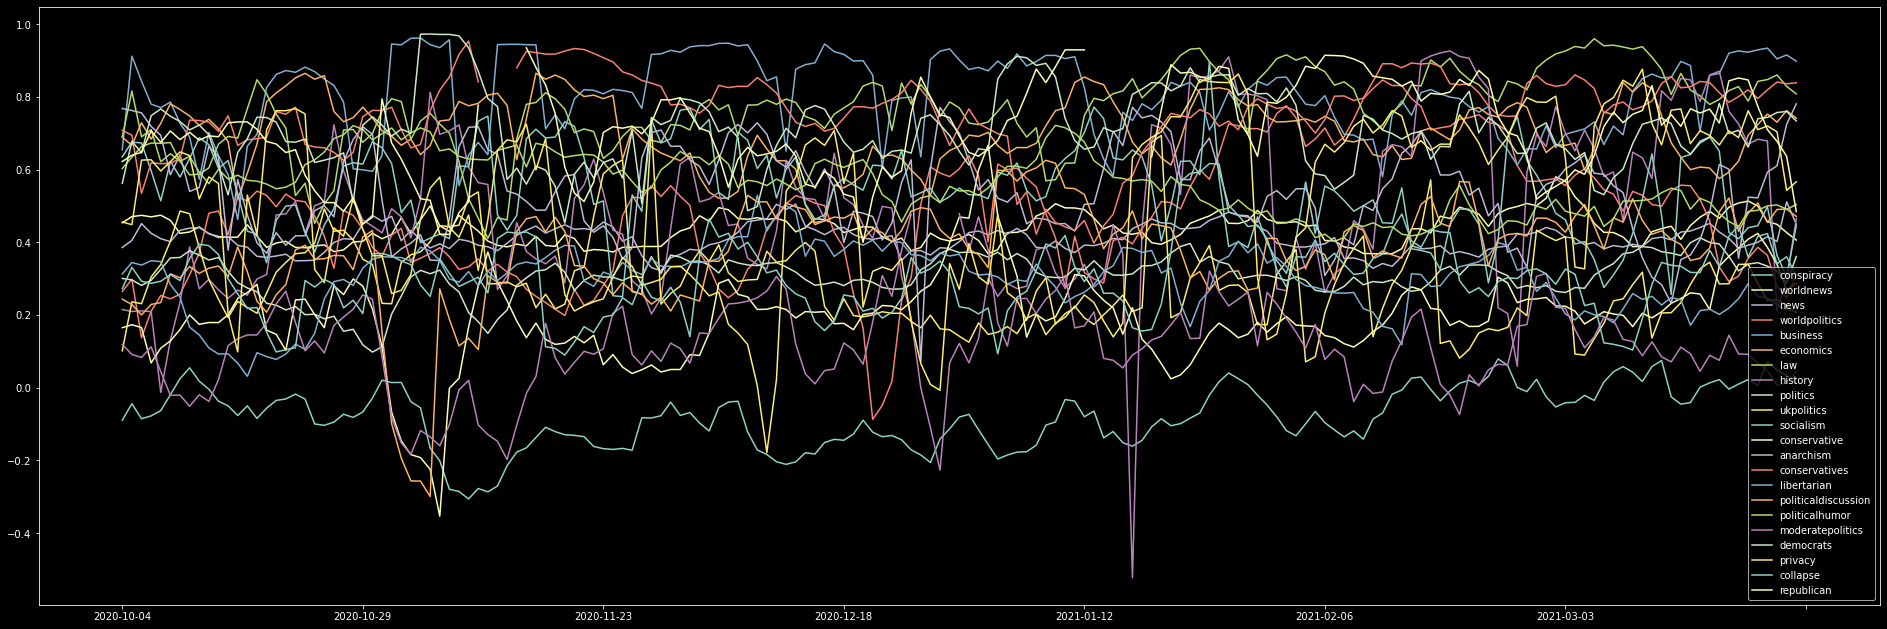

In [127]:
ei_data[subbert].plot(figsize=(33,11))

In [84]:
plt.style.use('dark_background')

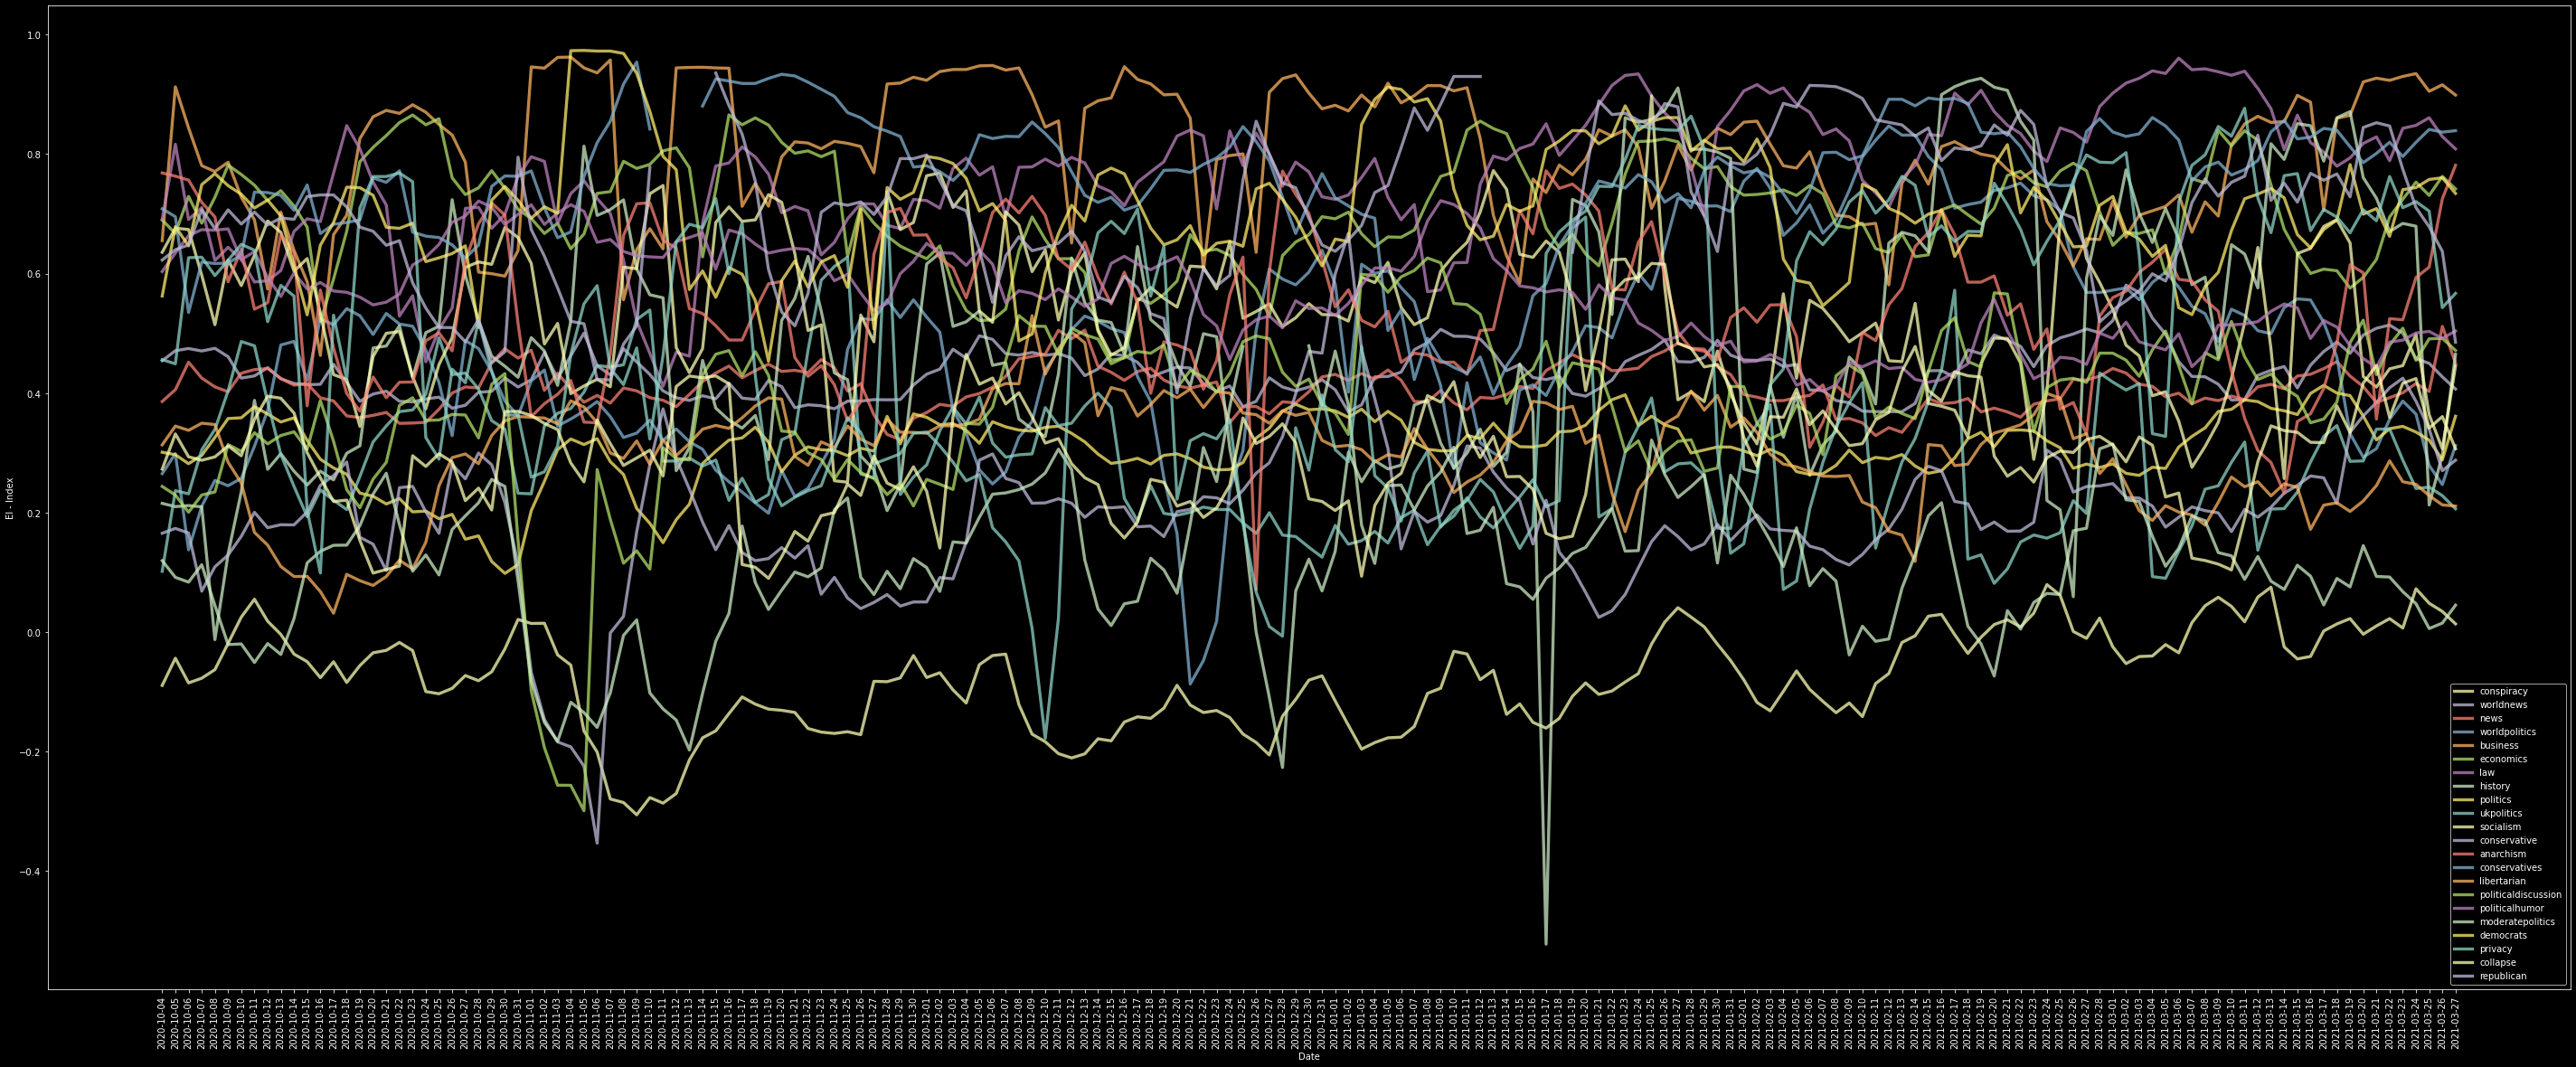

In [130]:
fig = plt.figure(figsize=(50,20))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
for sub in ei_data[subbert].columns:
    plt.plot(ei_data.index, ei_data[subbert][sub], lw=3.333, alpha=0.75, label=sub)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('EI - Index')
plt.legend()

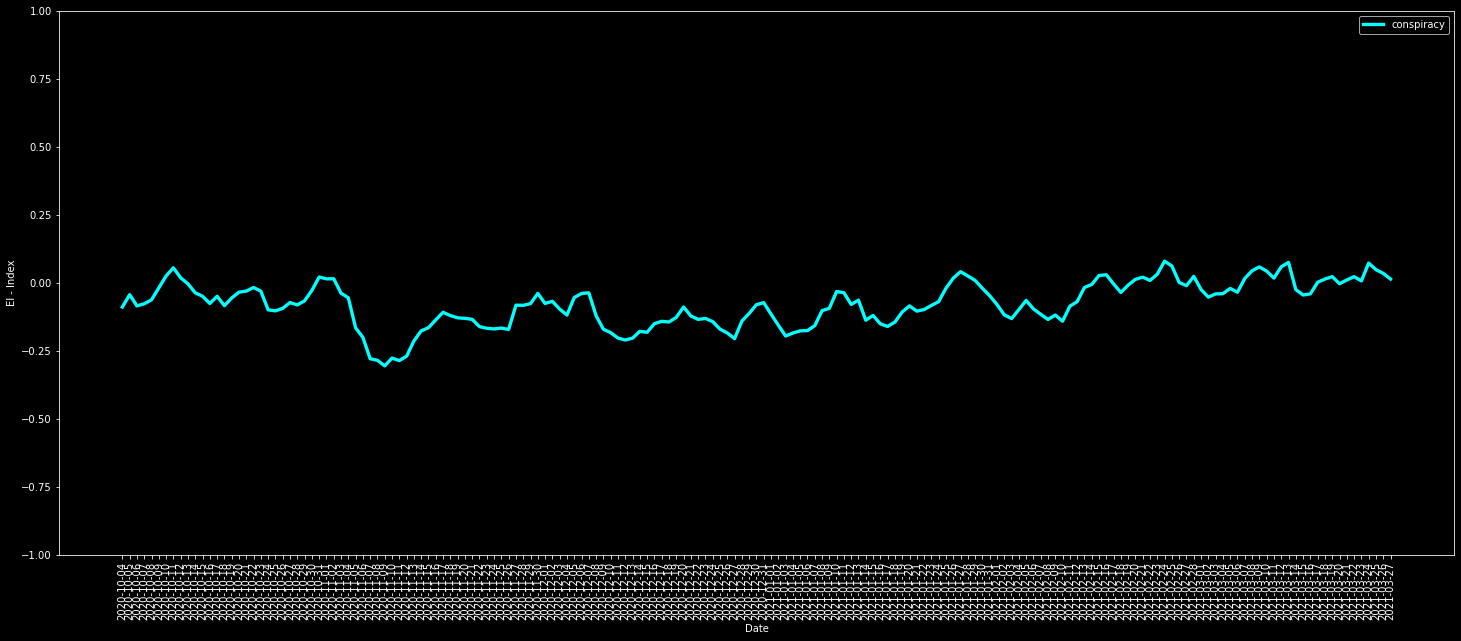

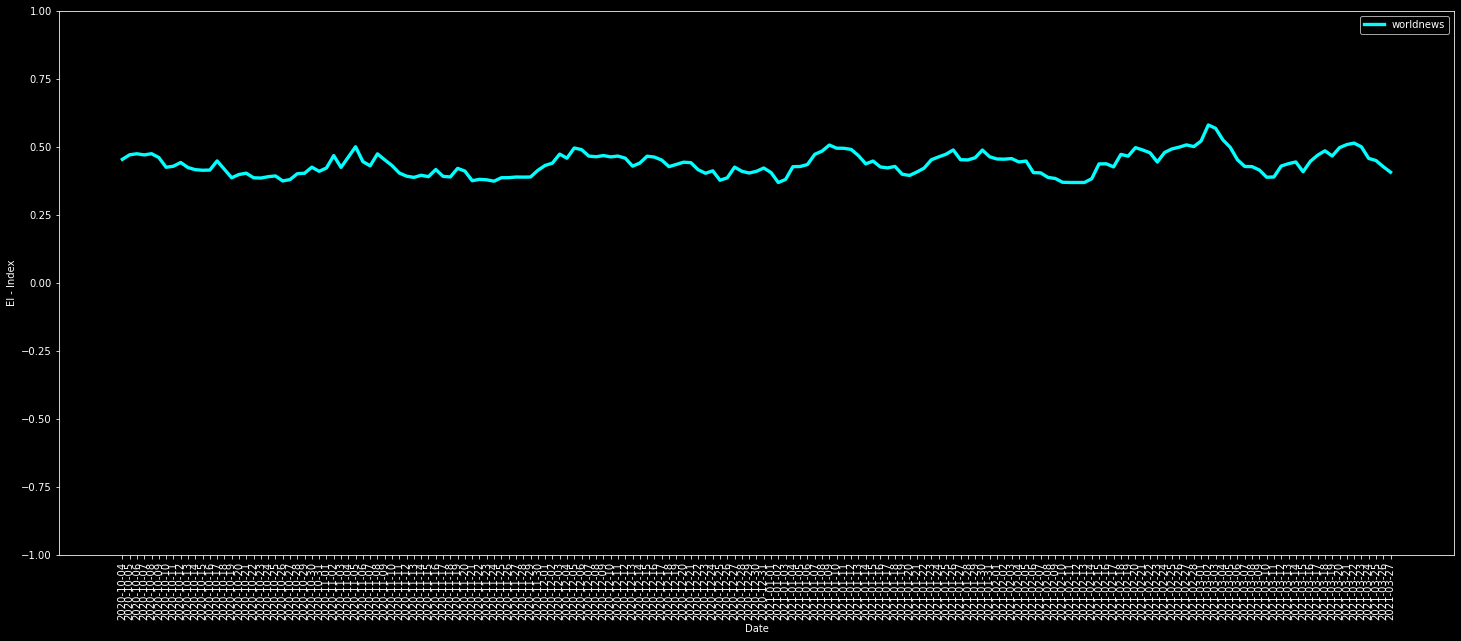

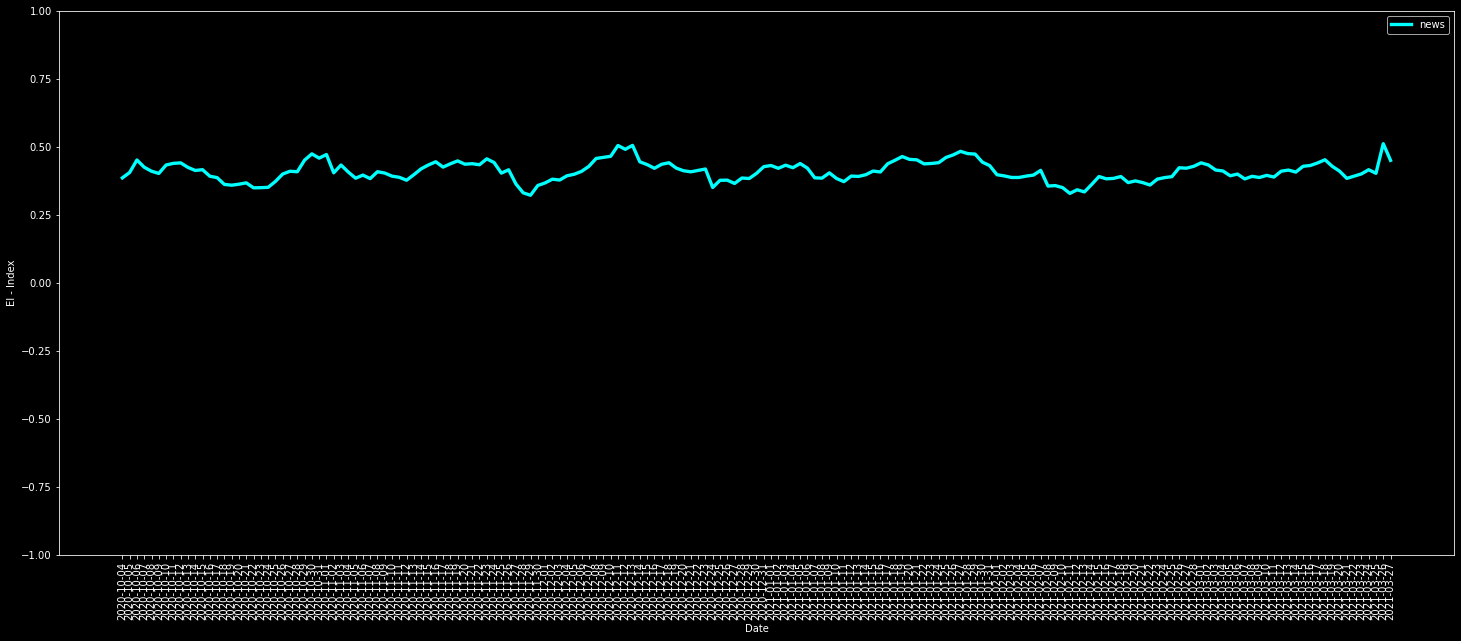

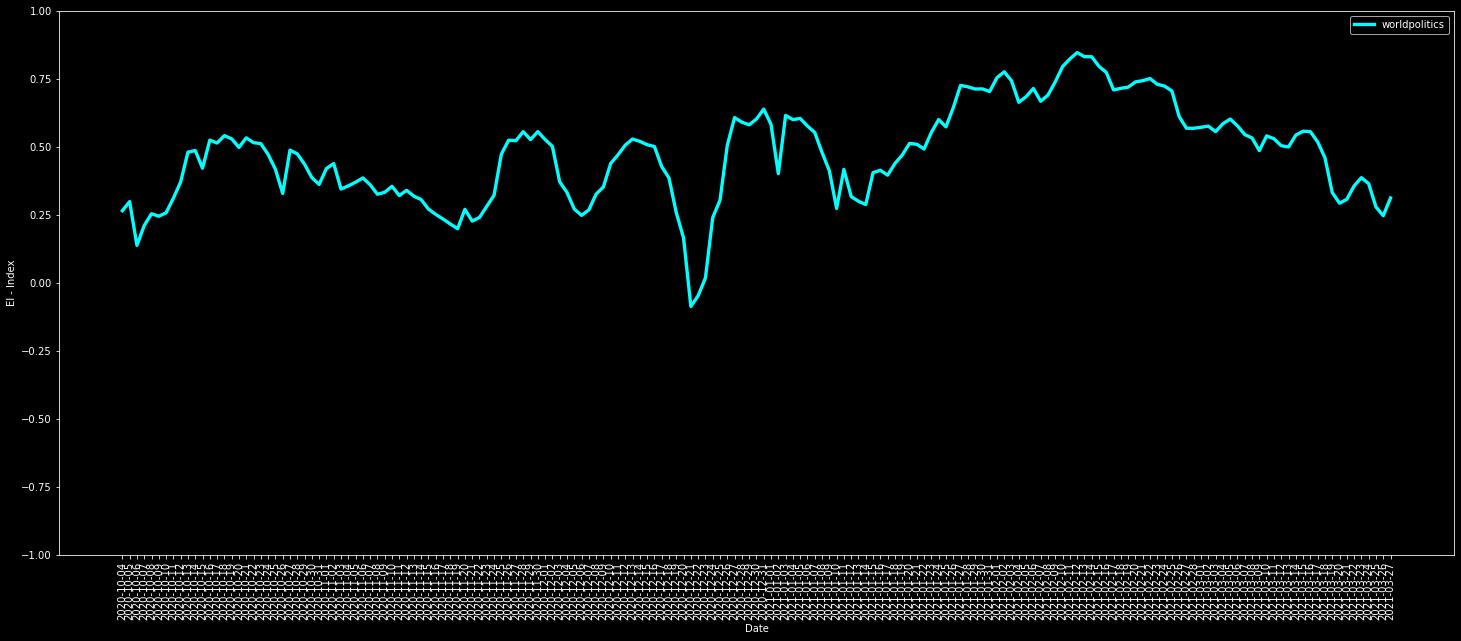

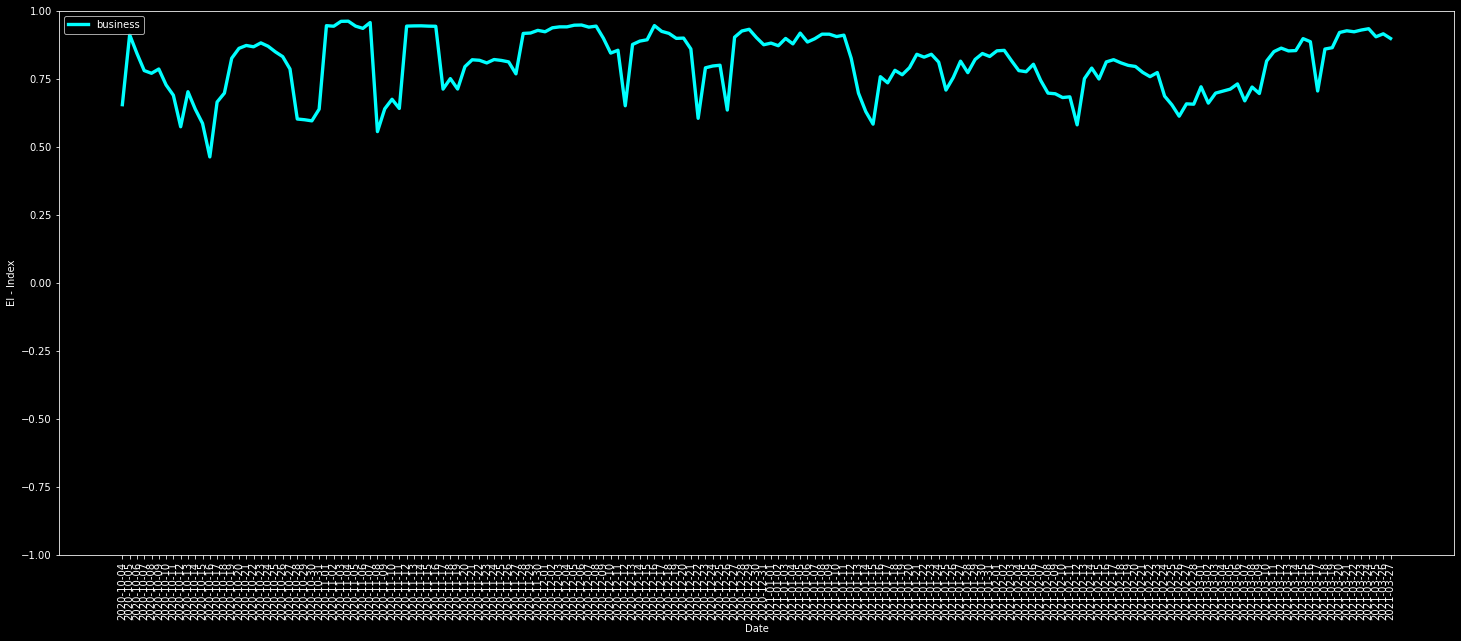

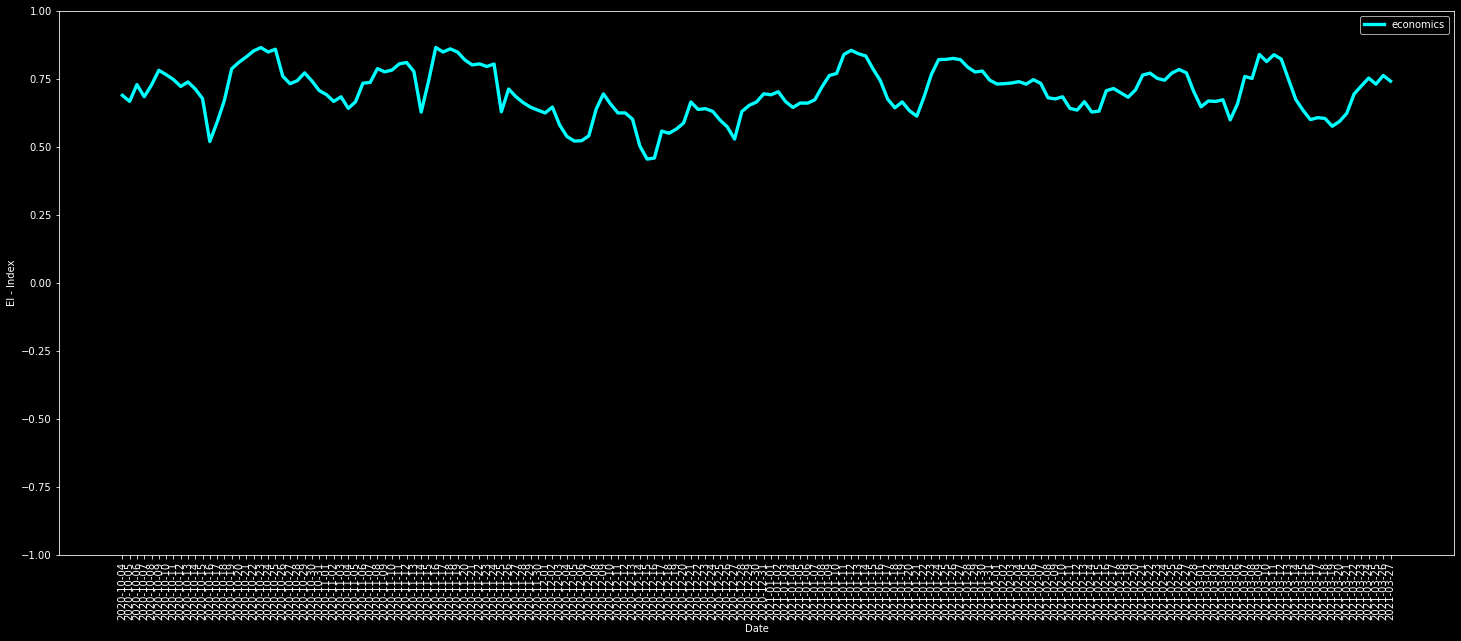

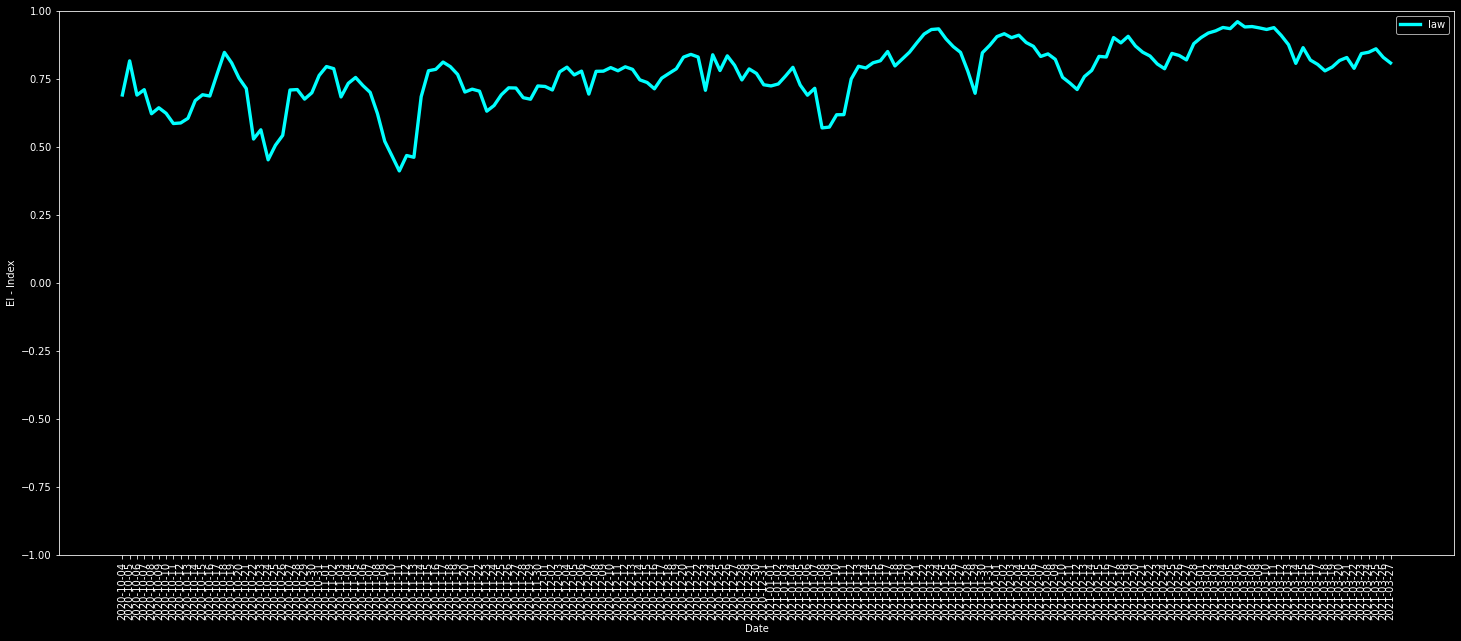

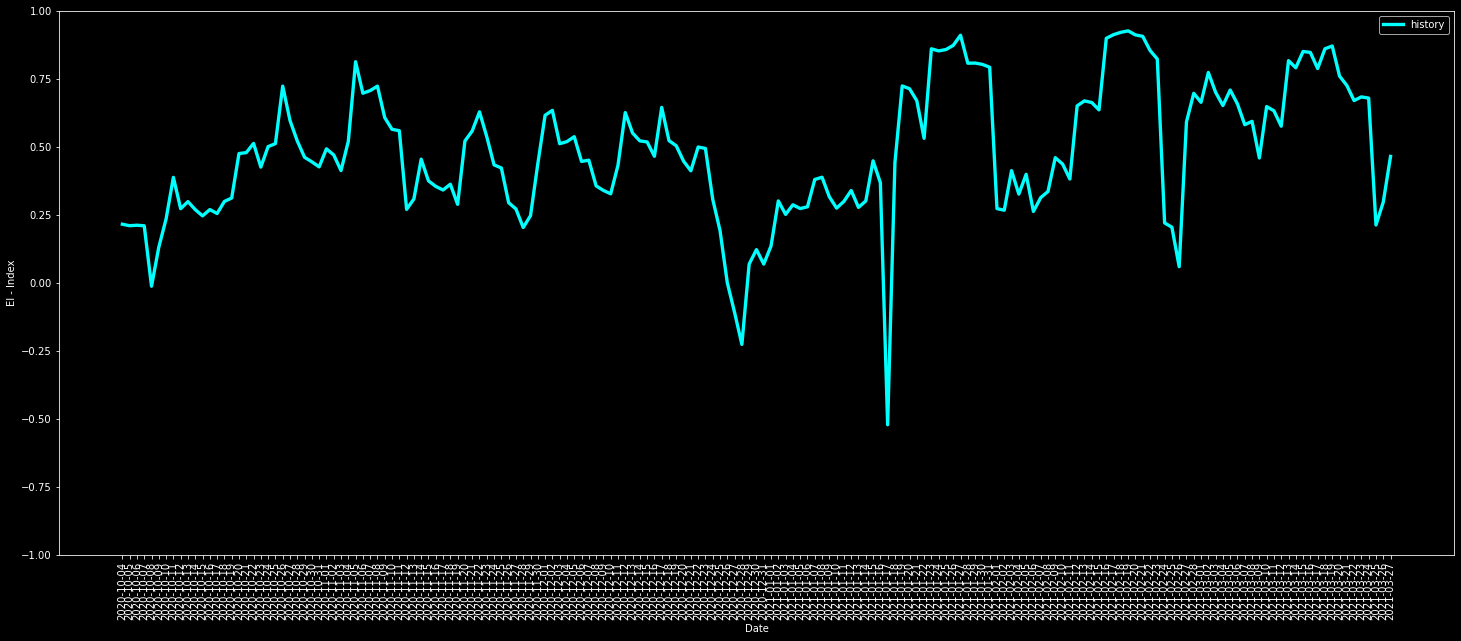

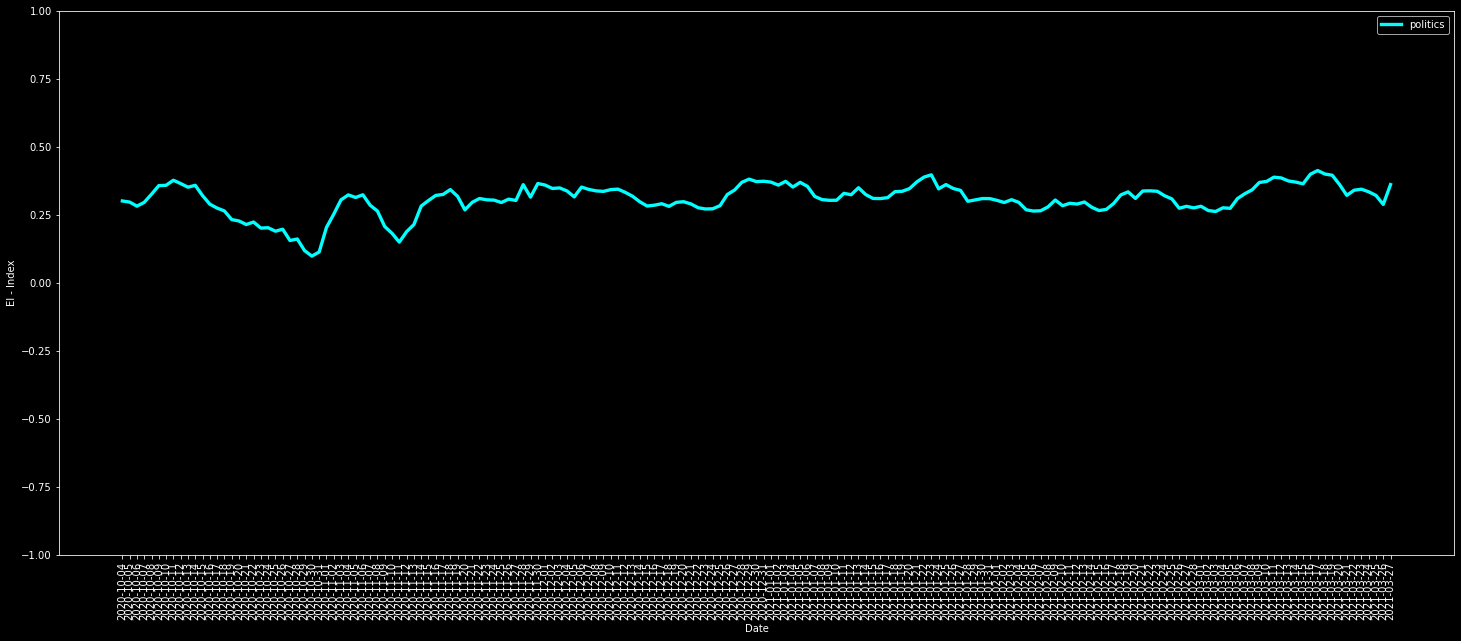

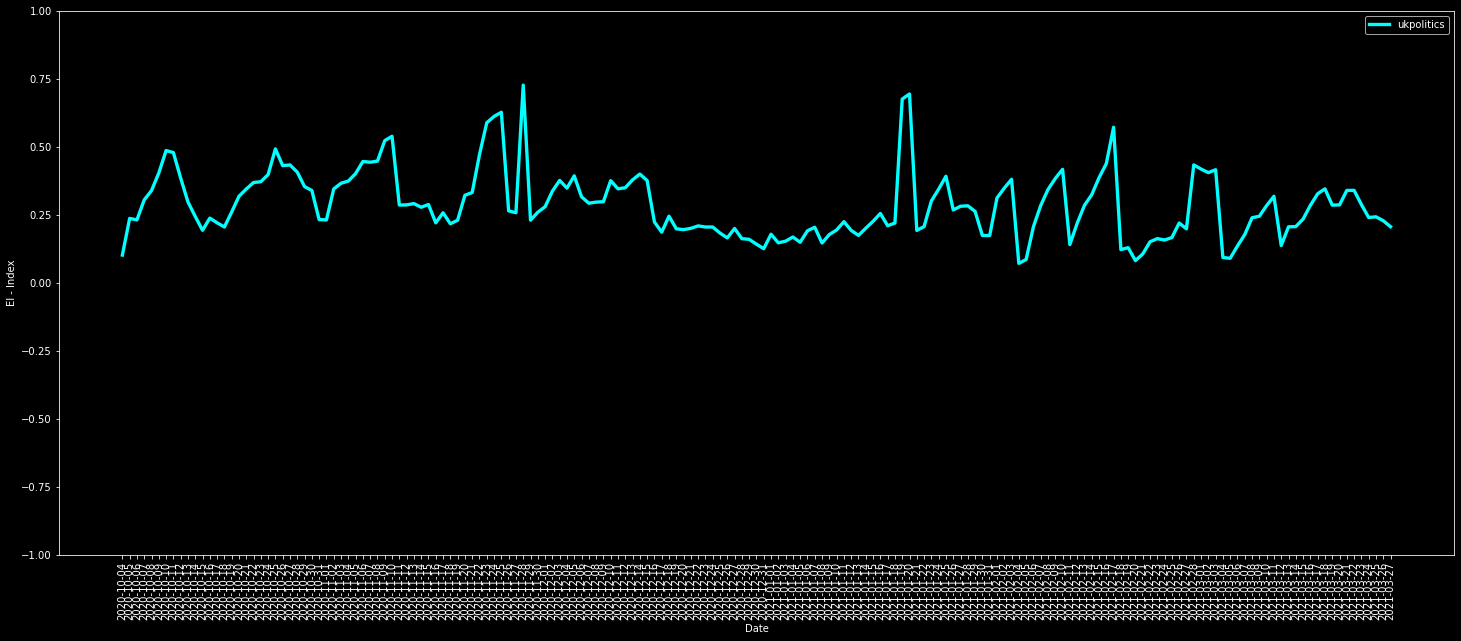

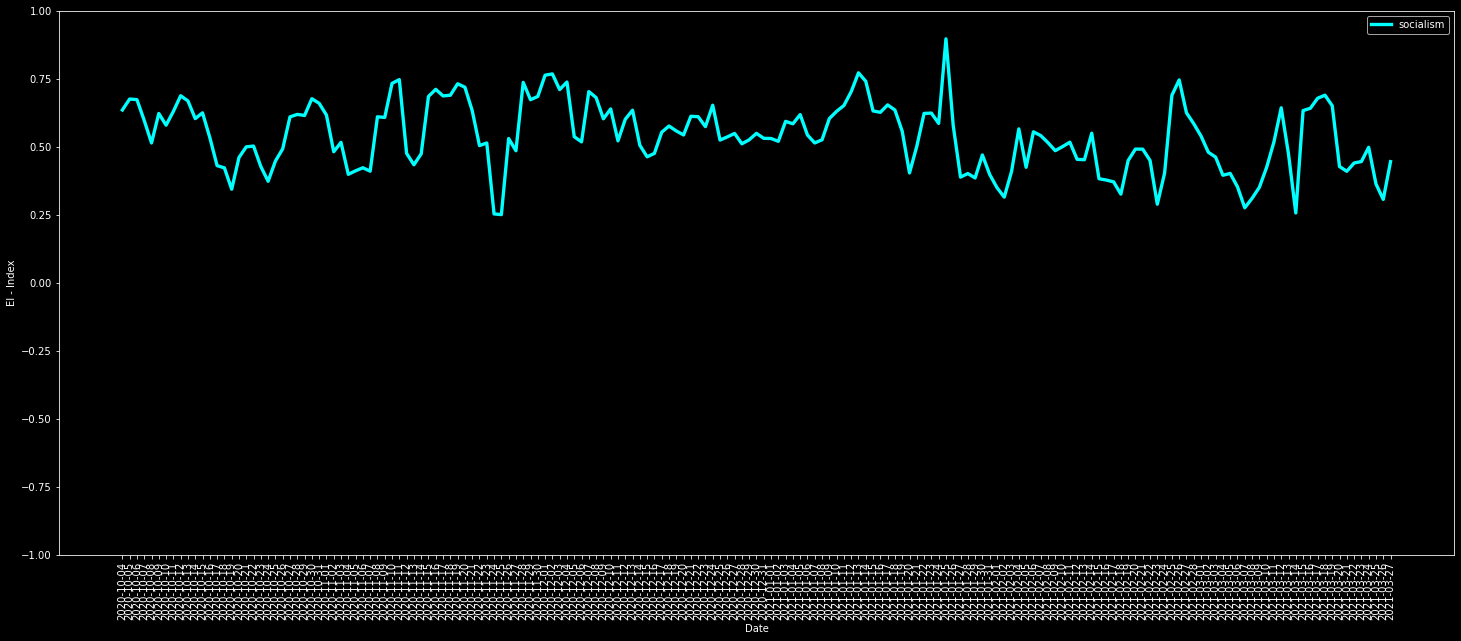

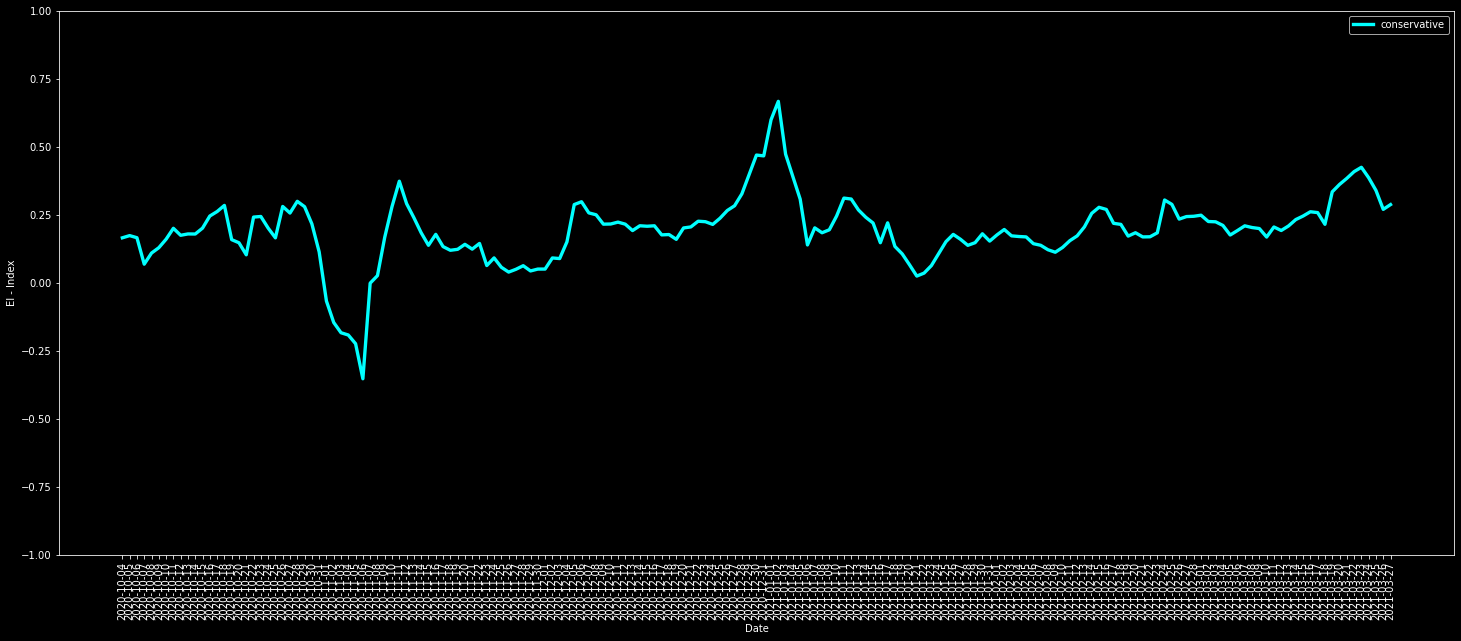

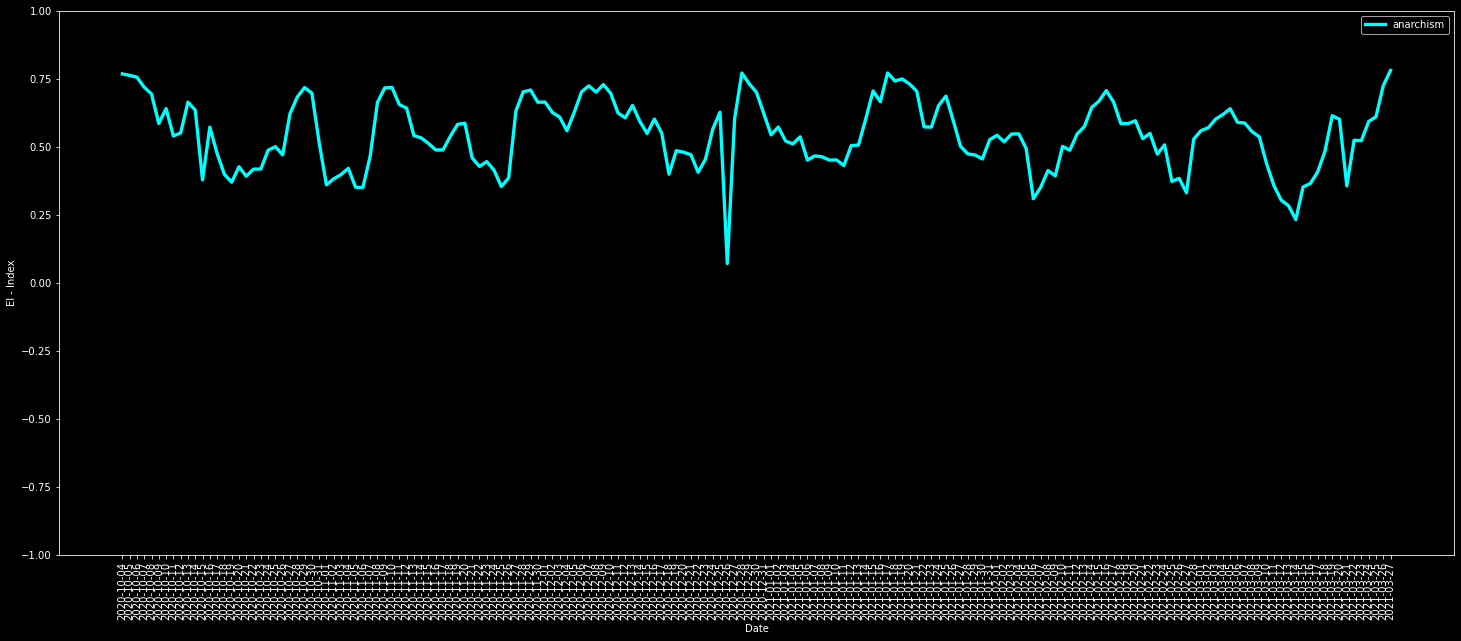

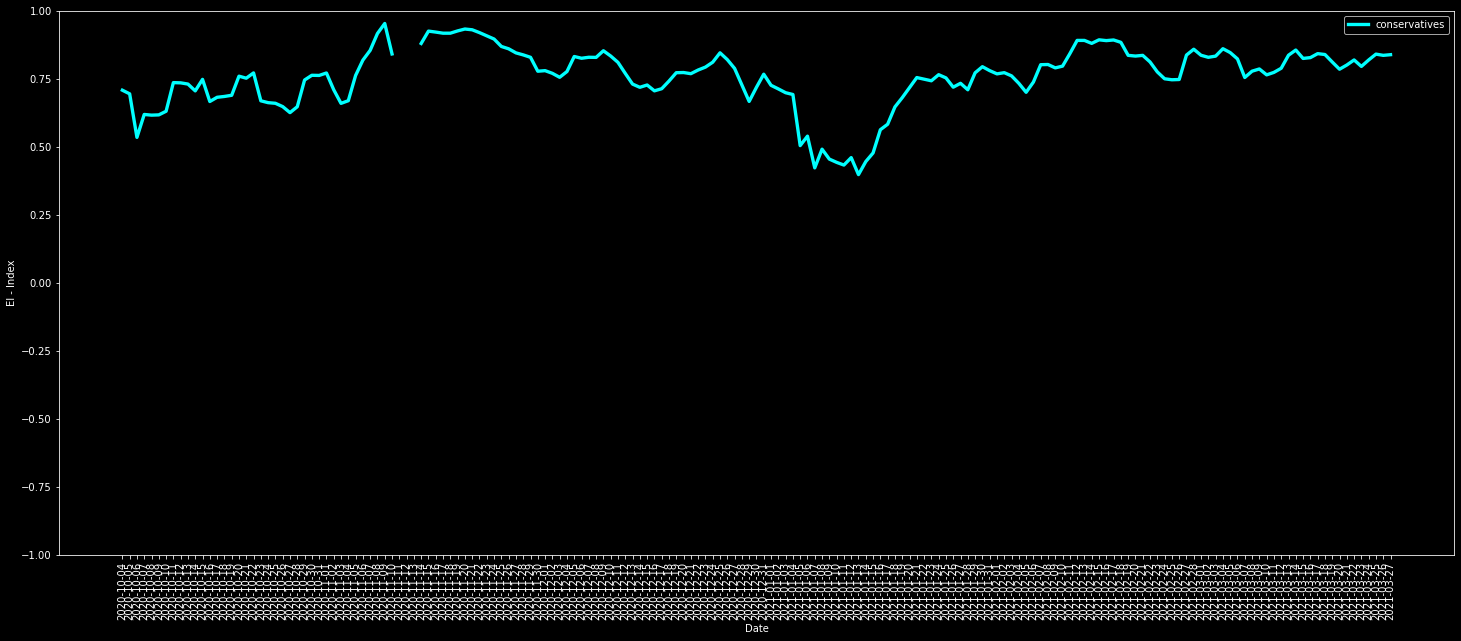

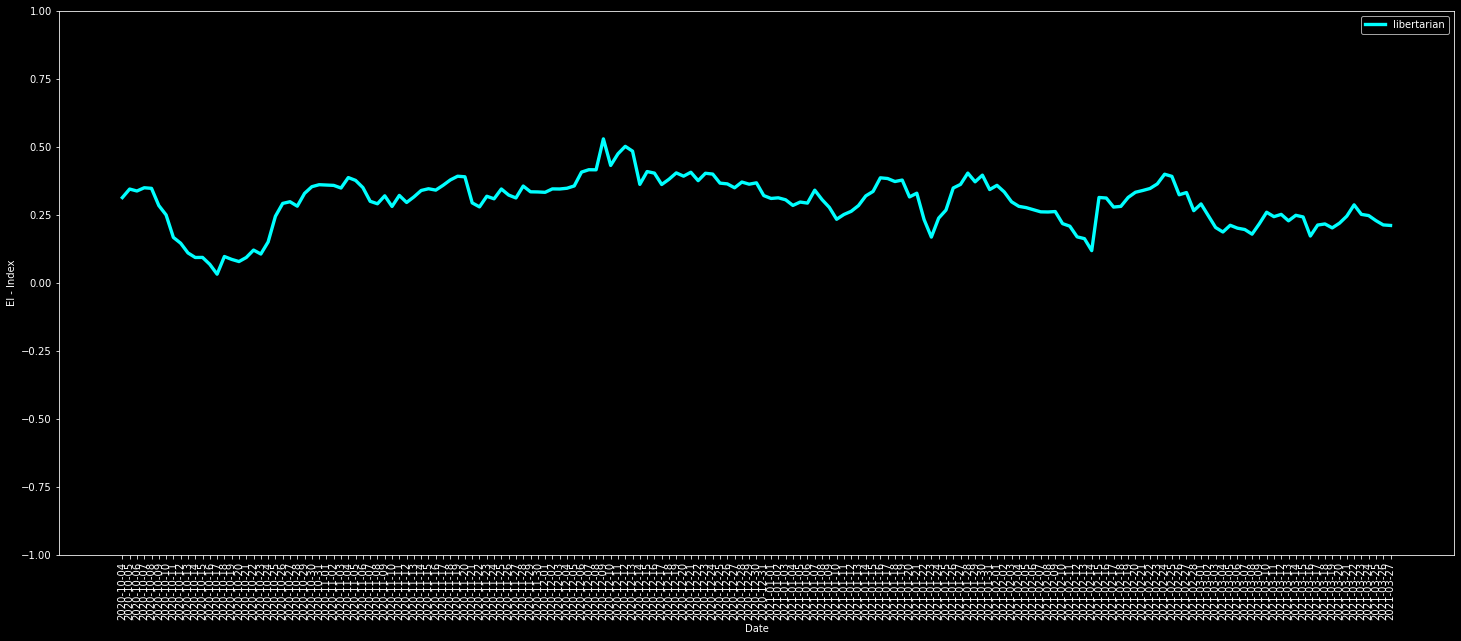

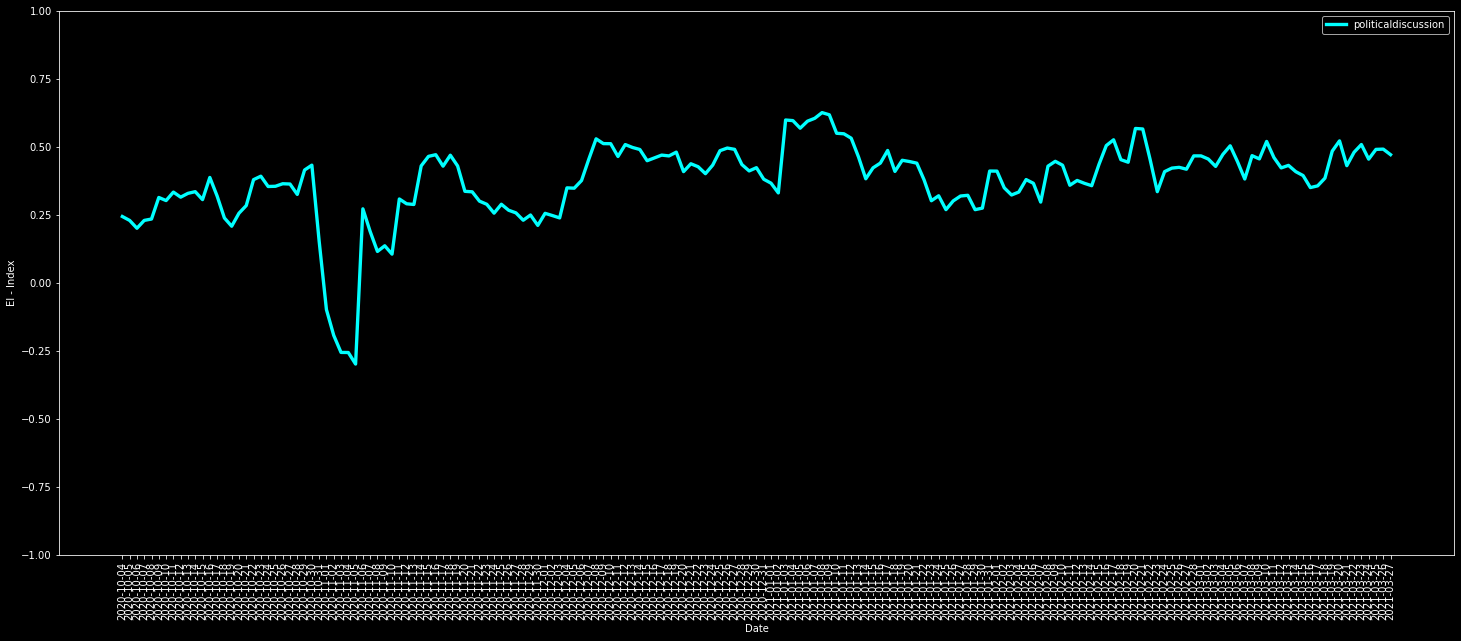

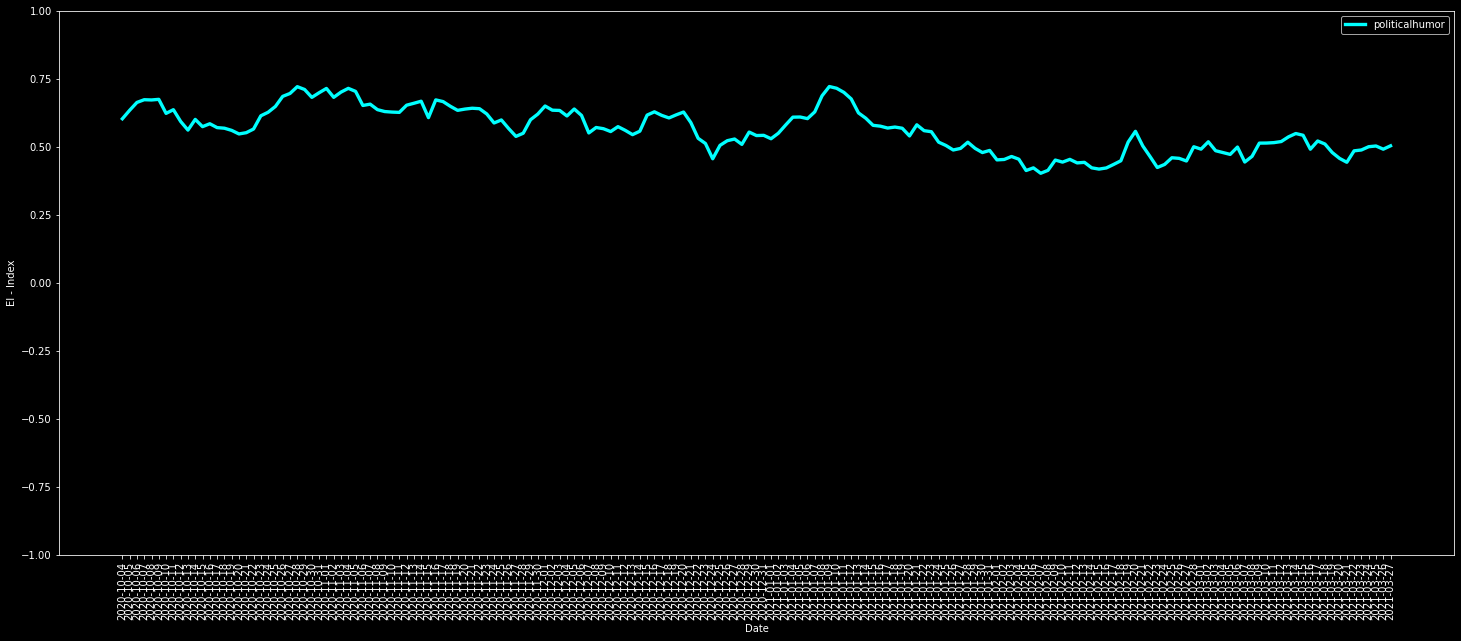

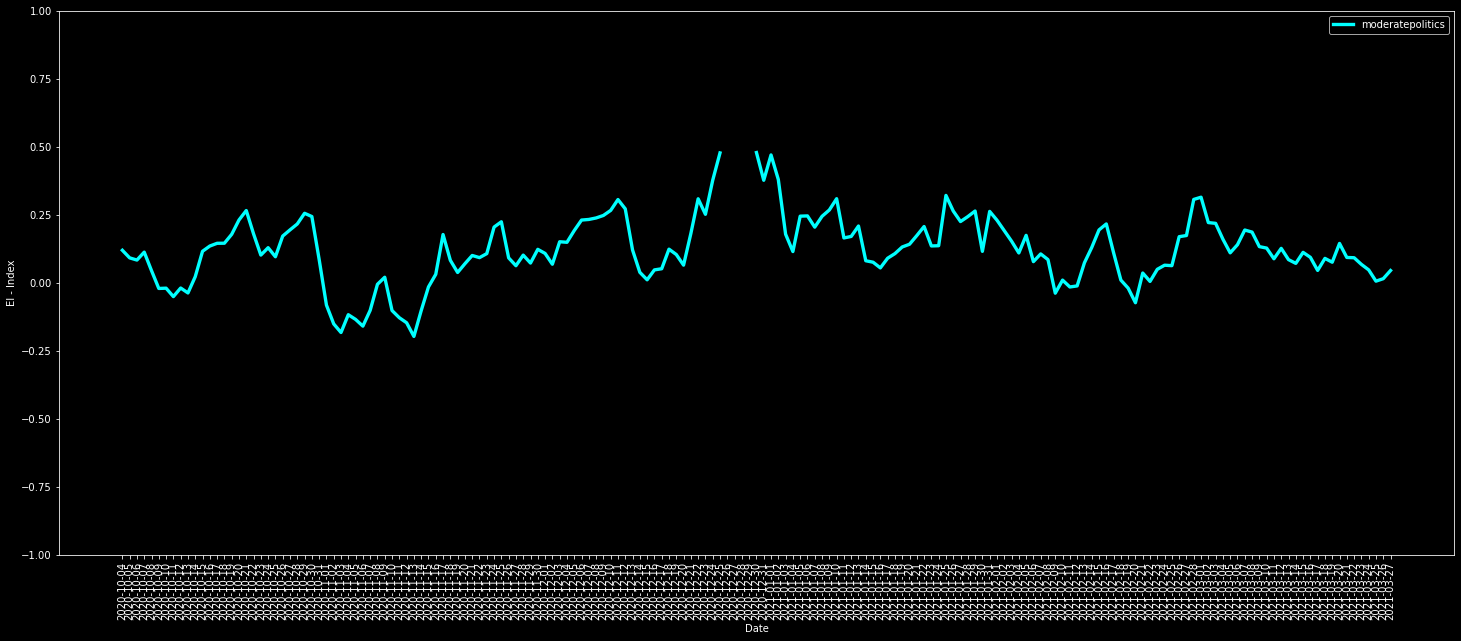

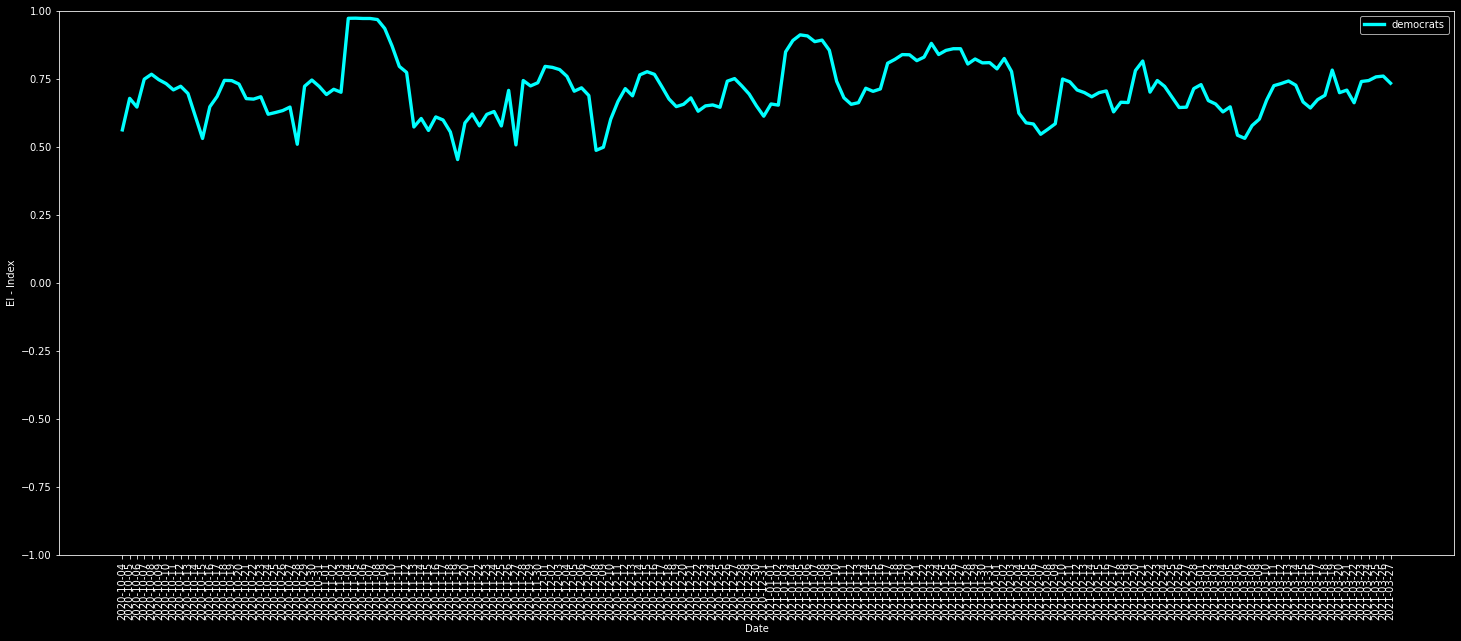

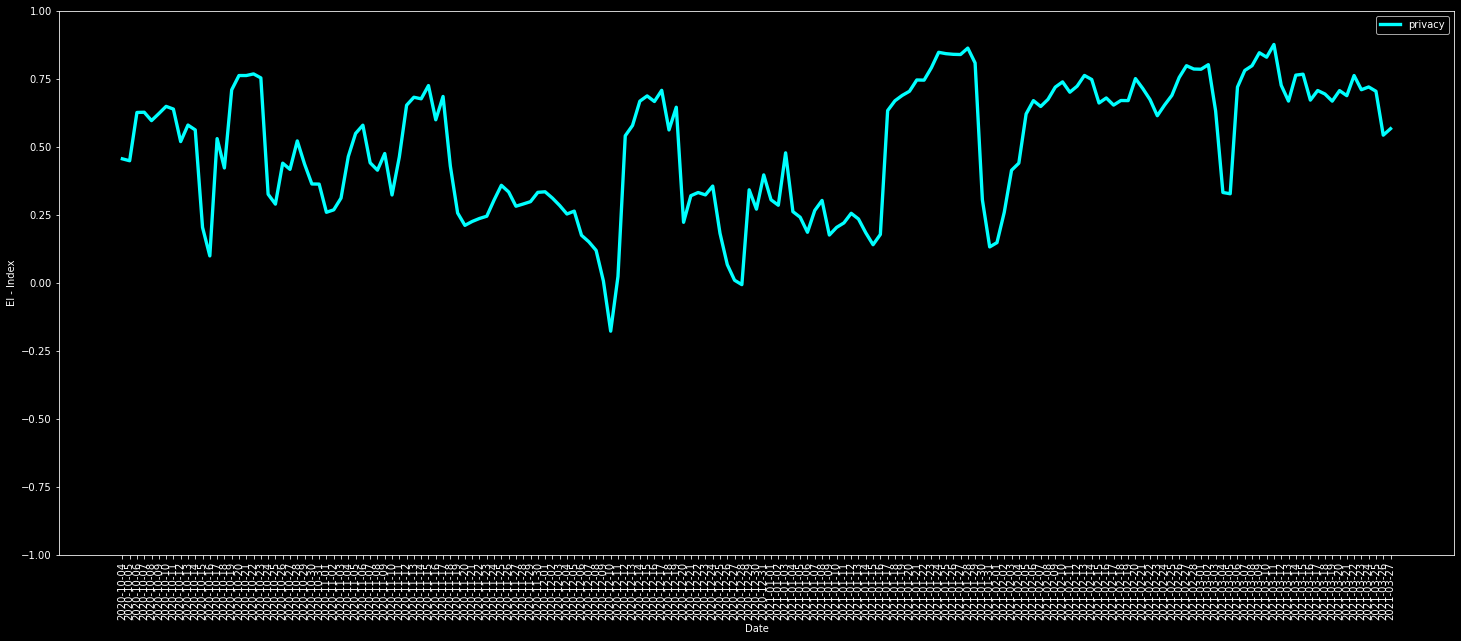

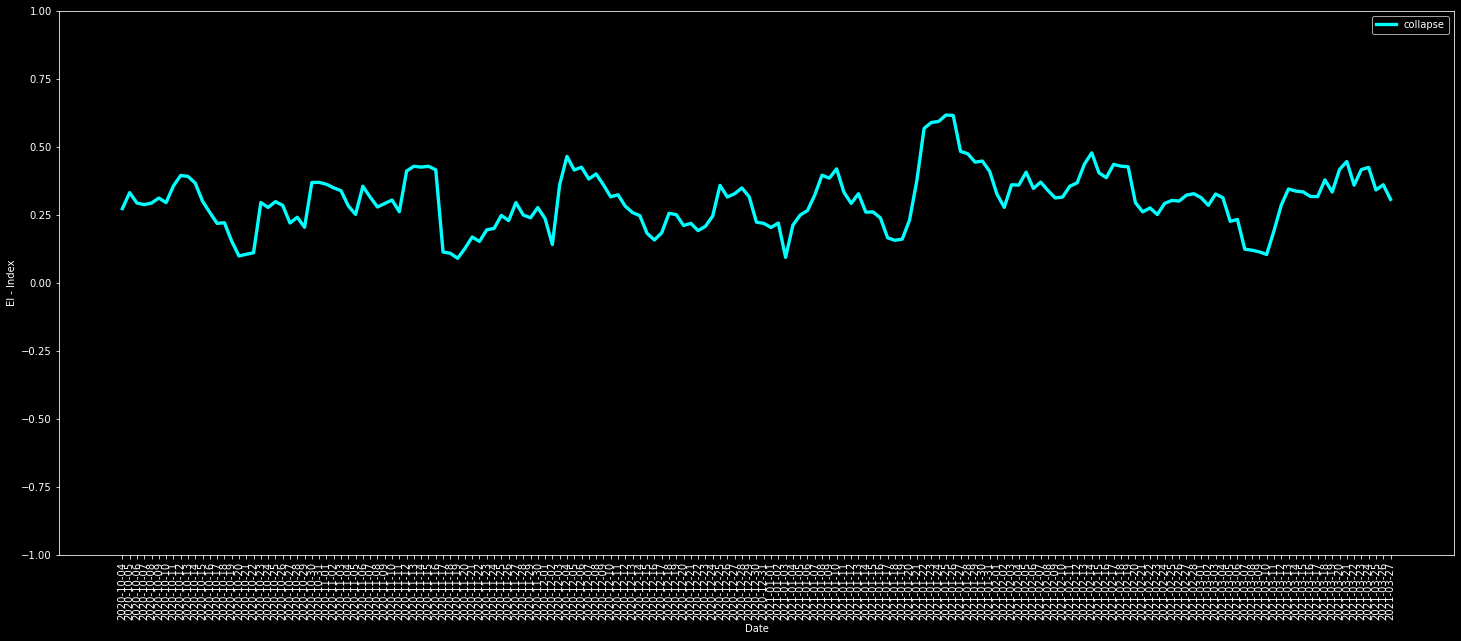

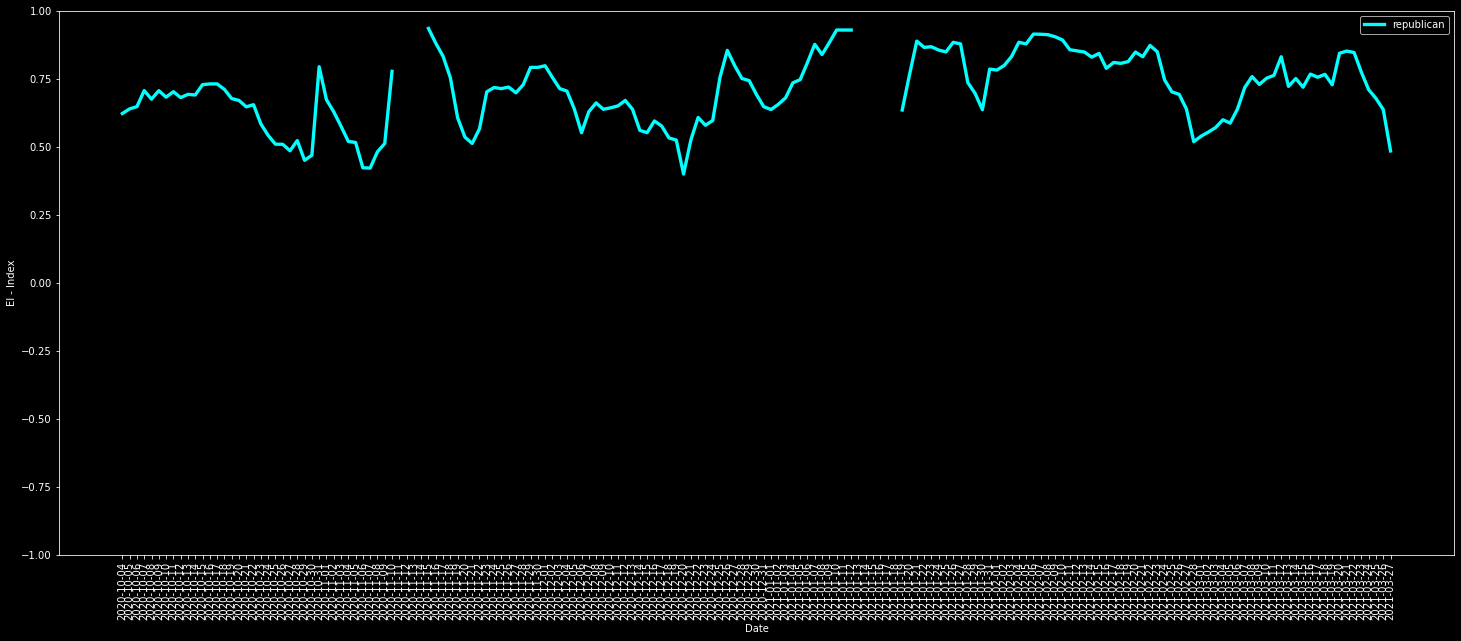

In [135]:
for sub in ei_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(ei_data.index, ei_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('EI - Index')
    plt.ylim(-1,1)
    plt.legend()

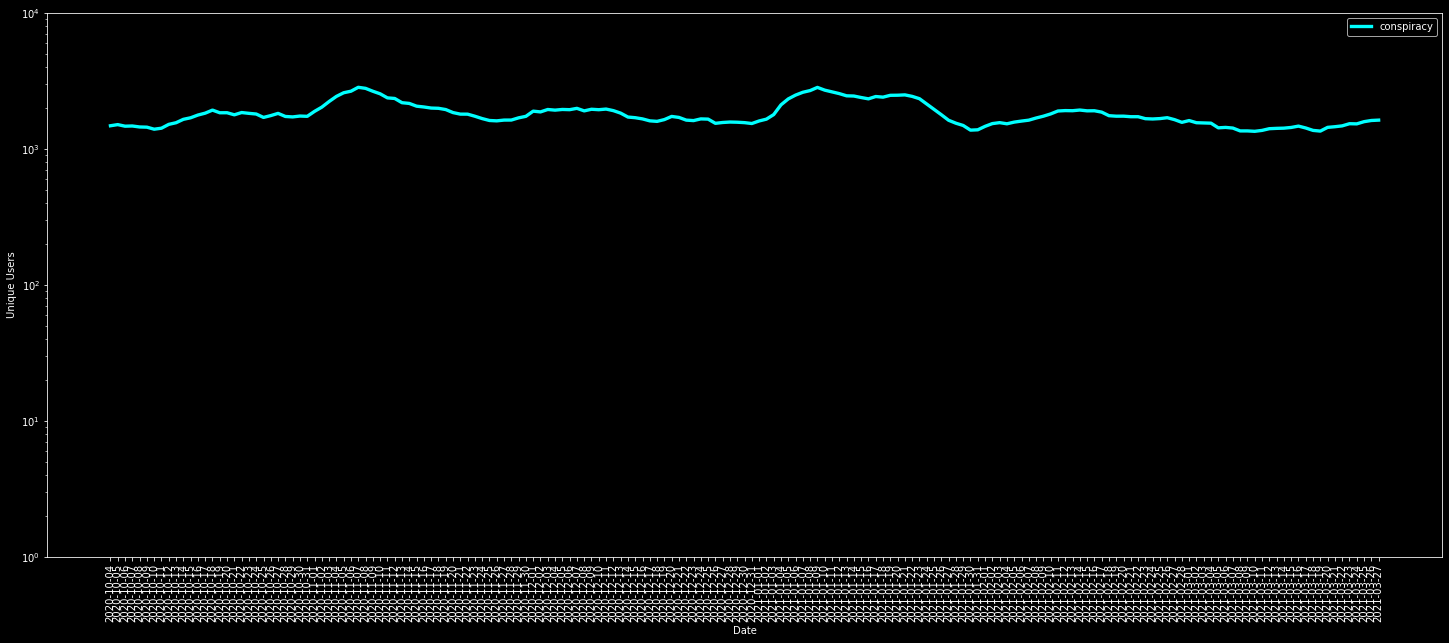

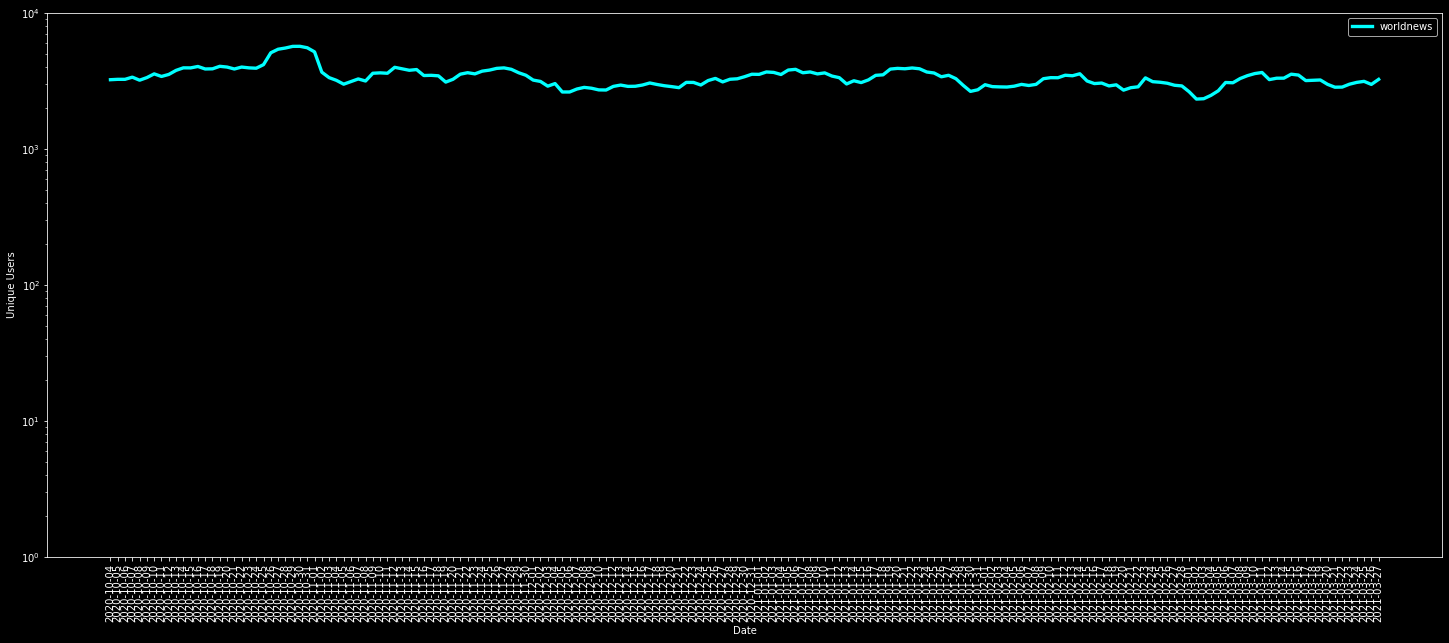

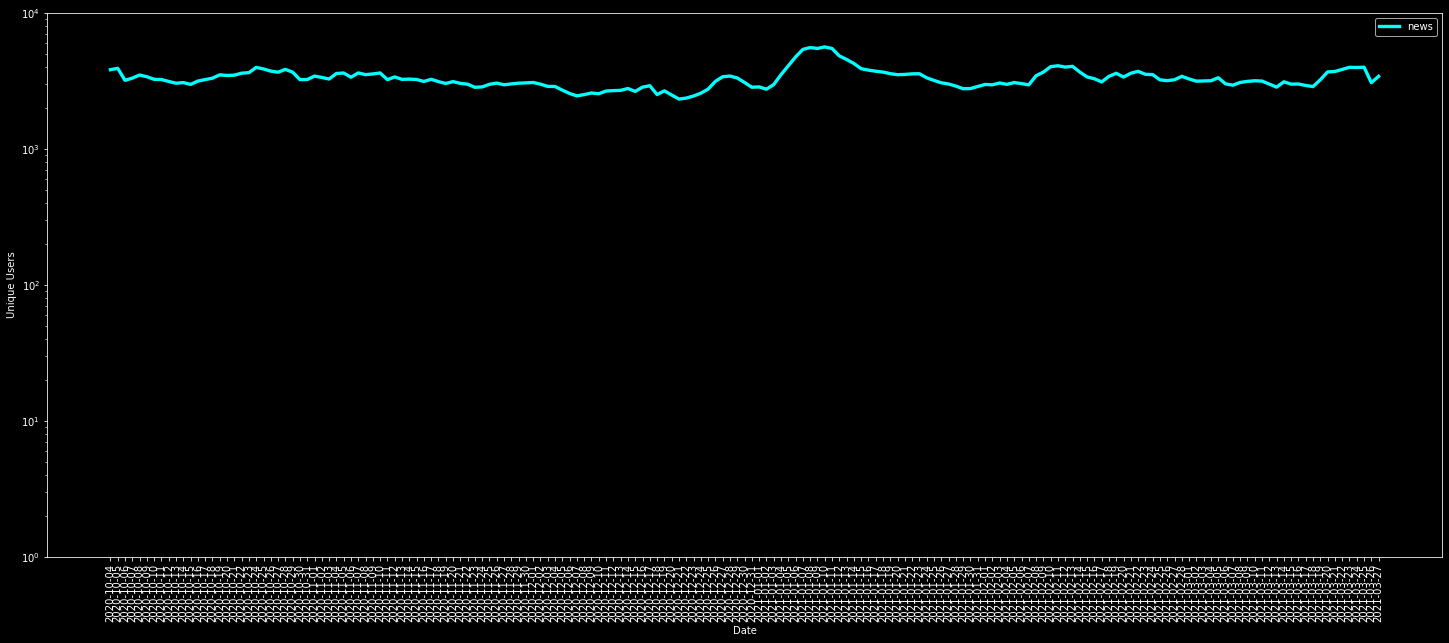

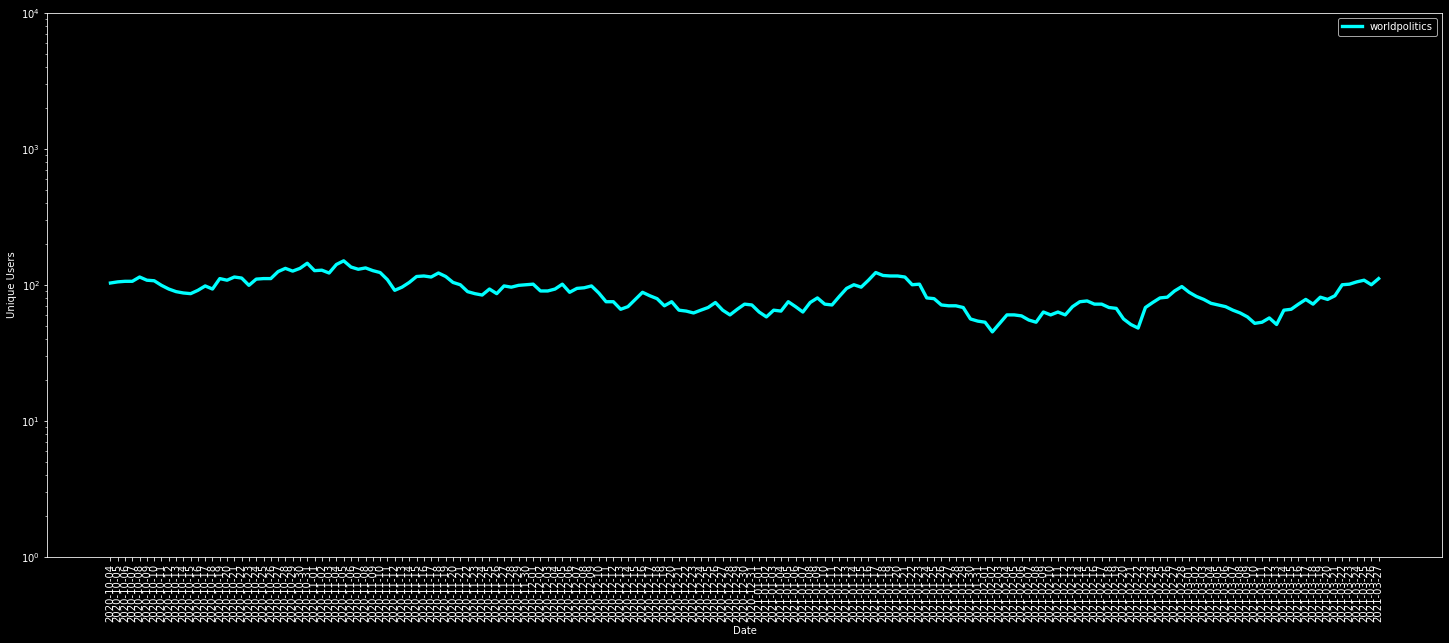

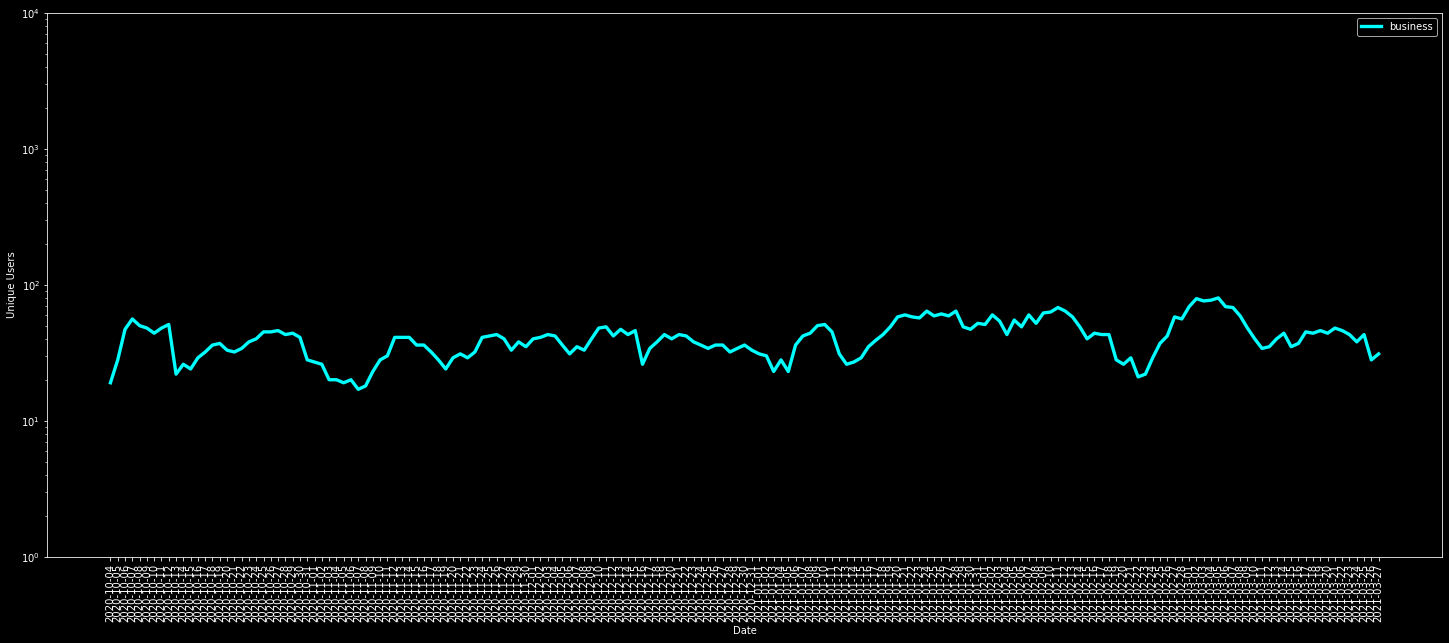

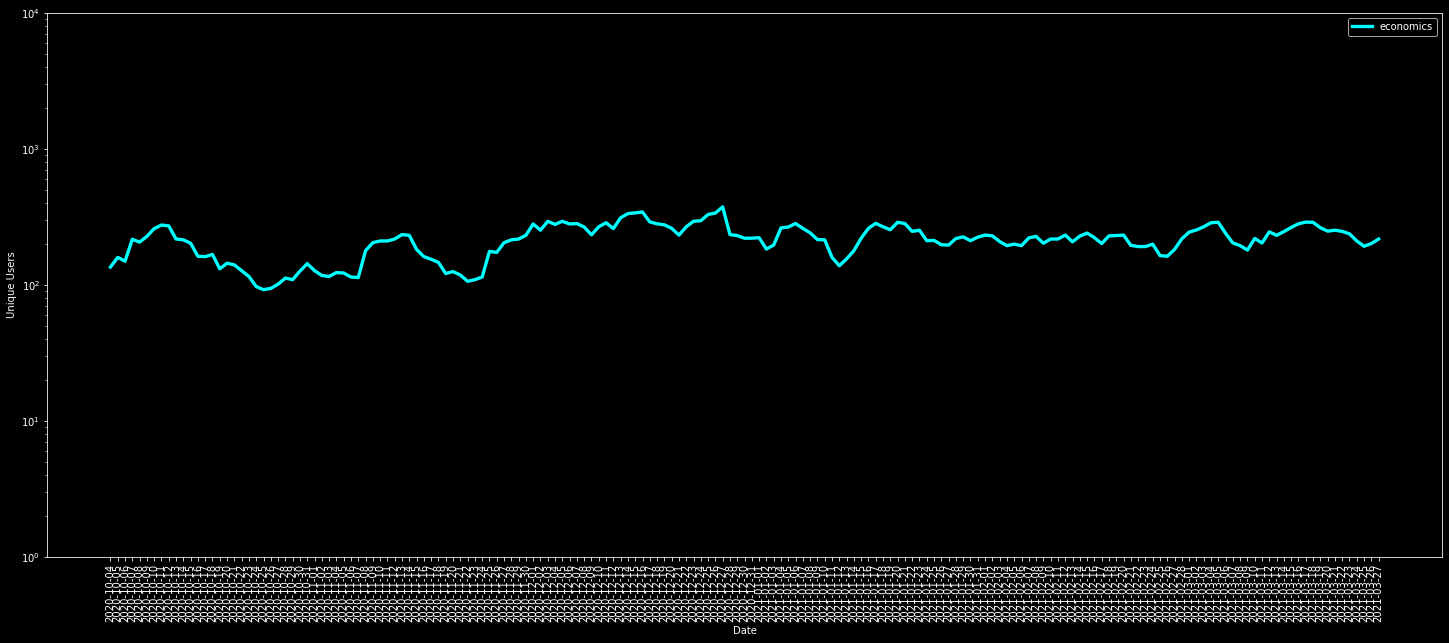

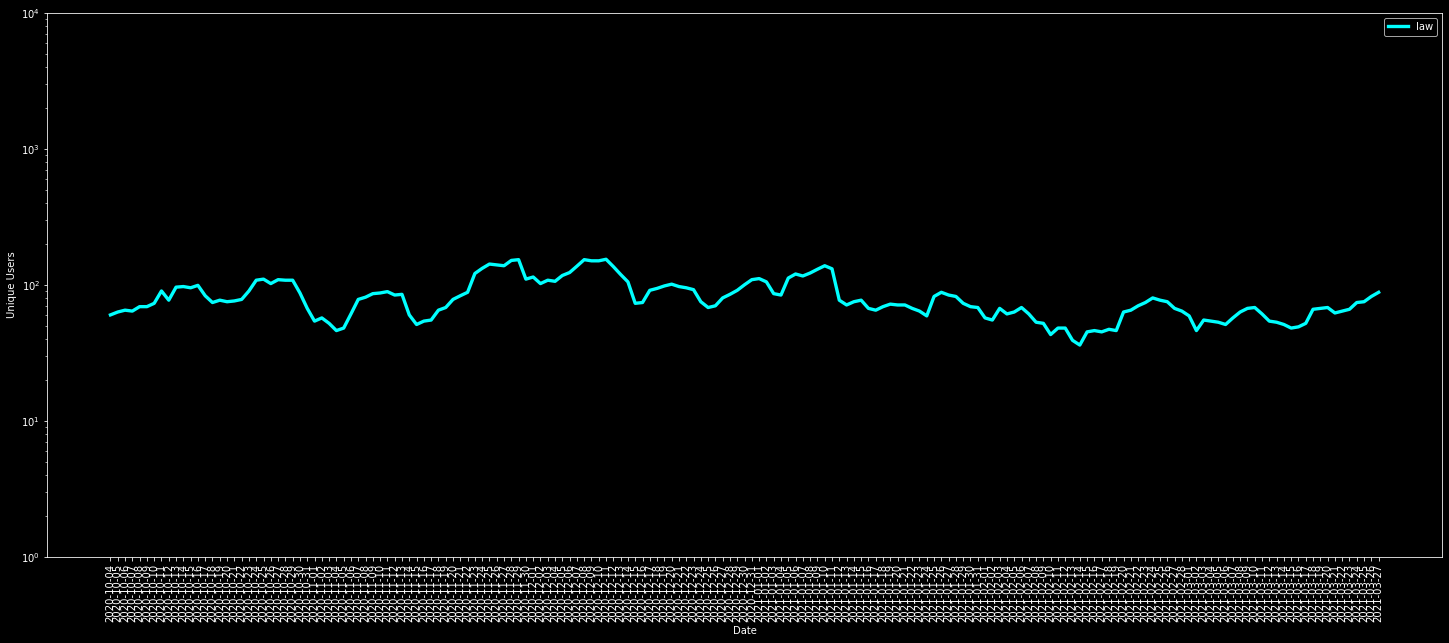

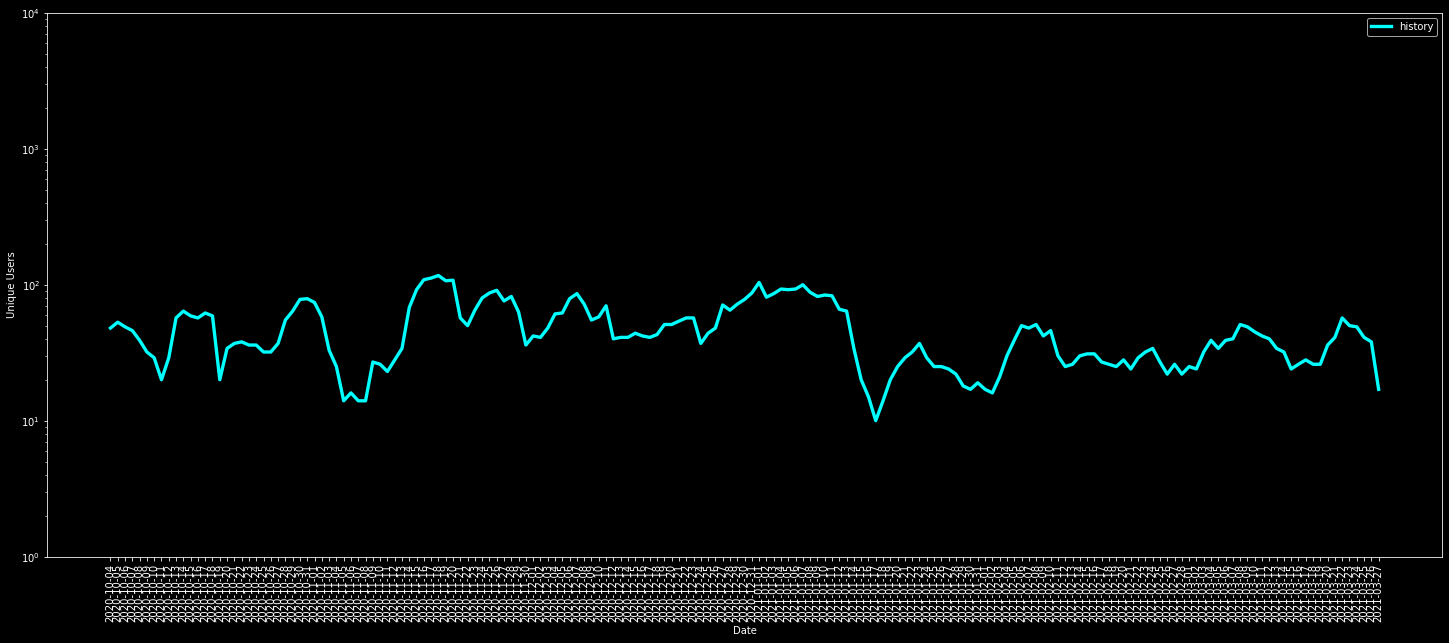

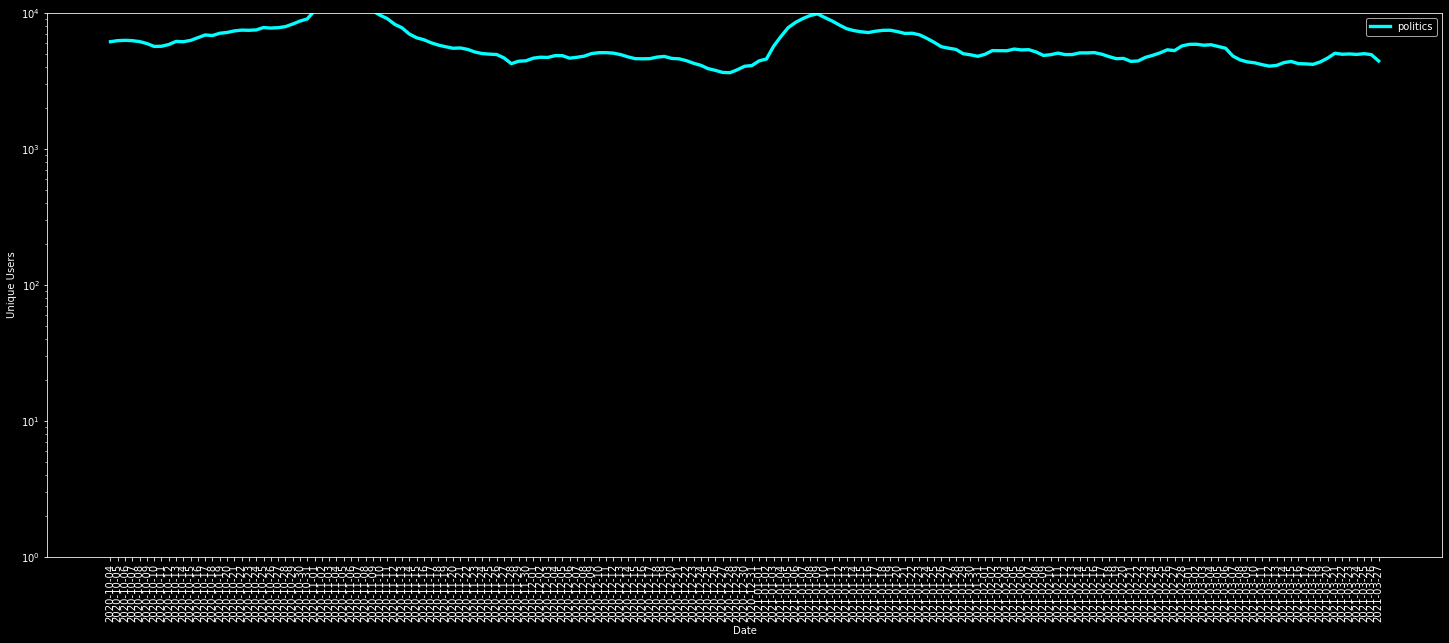

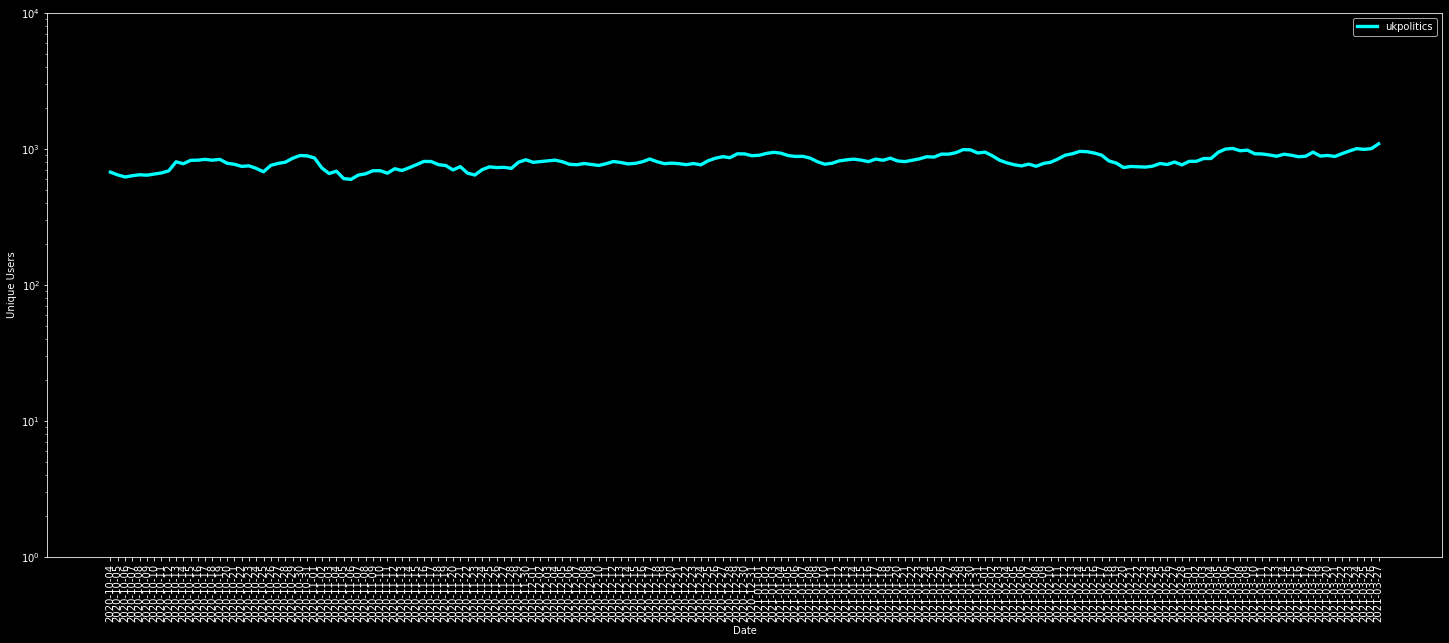

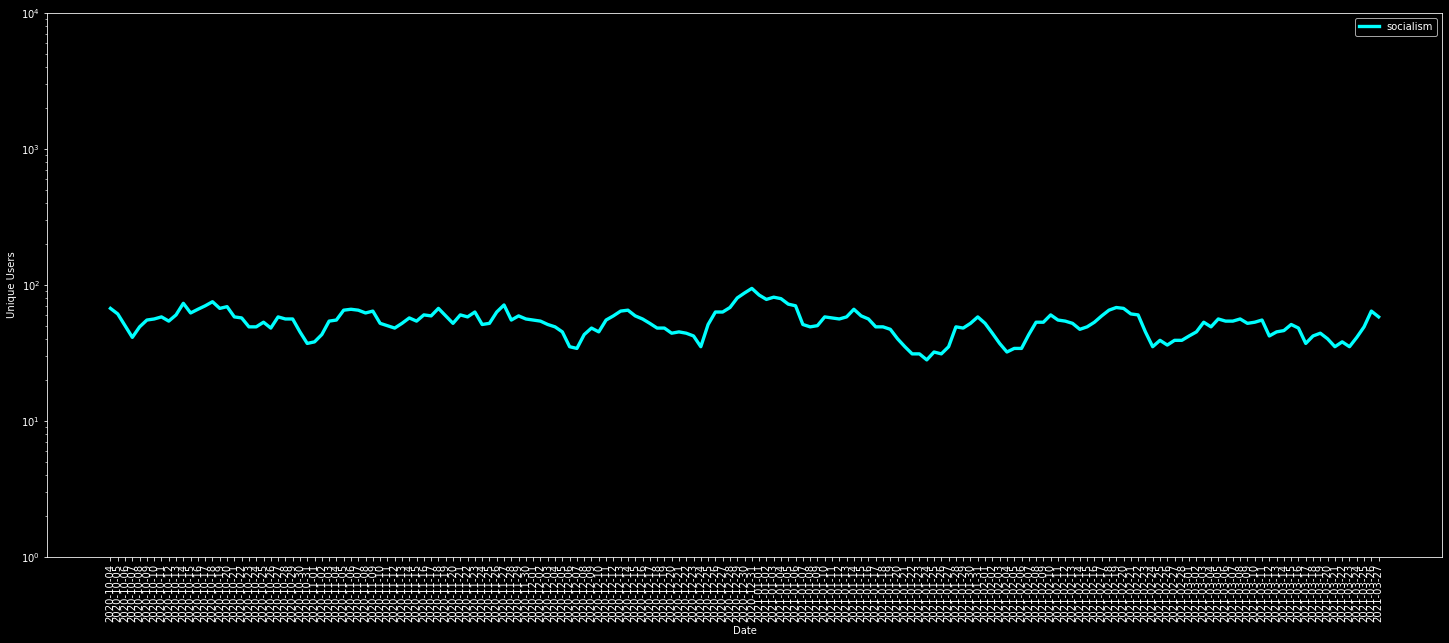

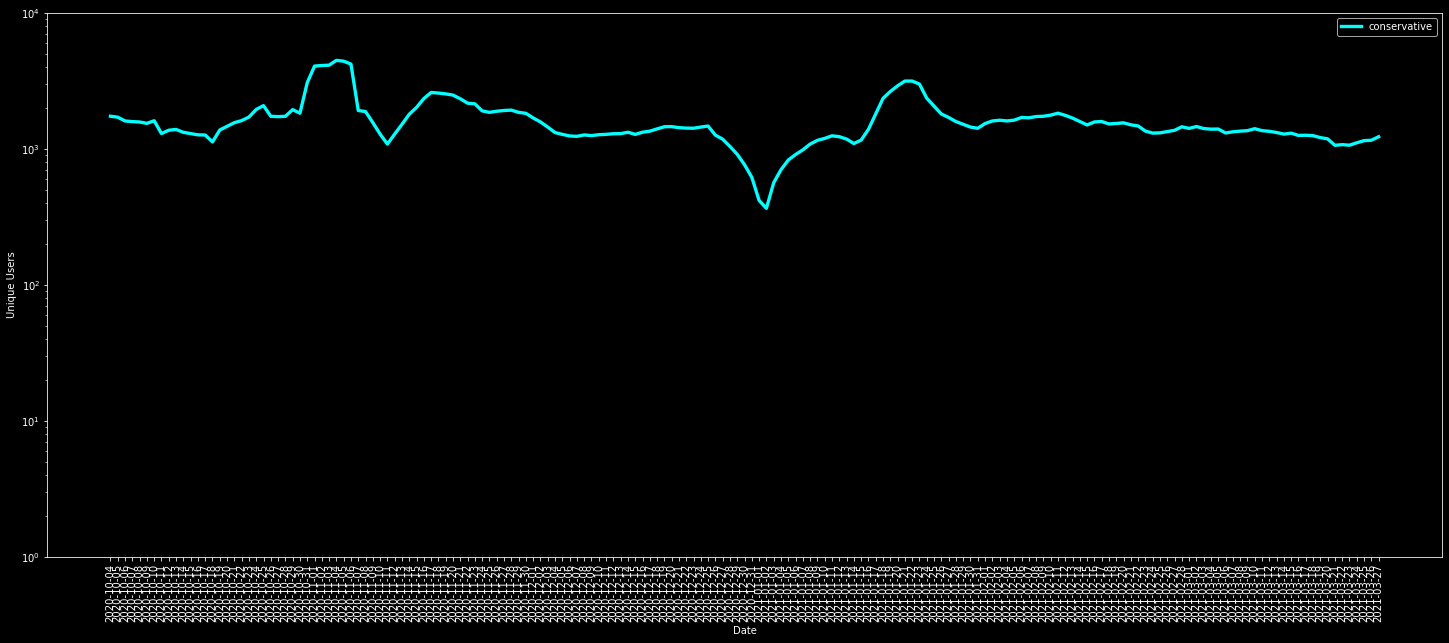

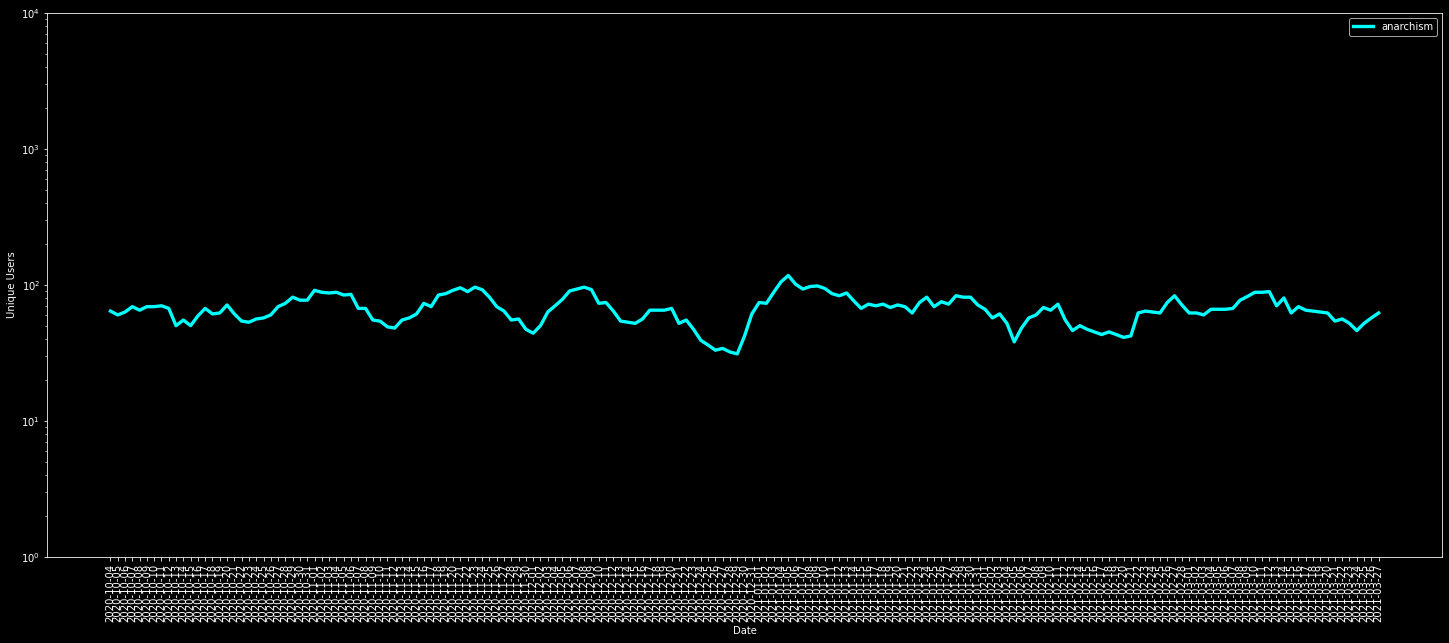

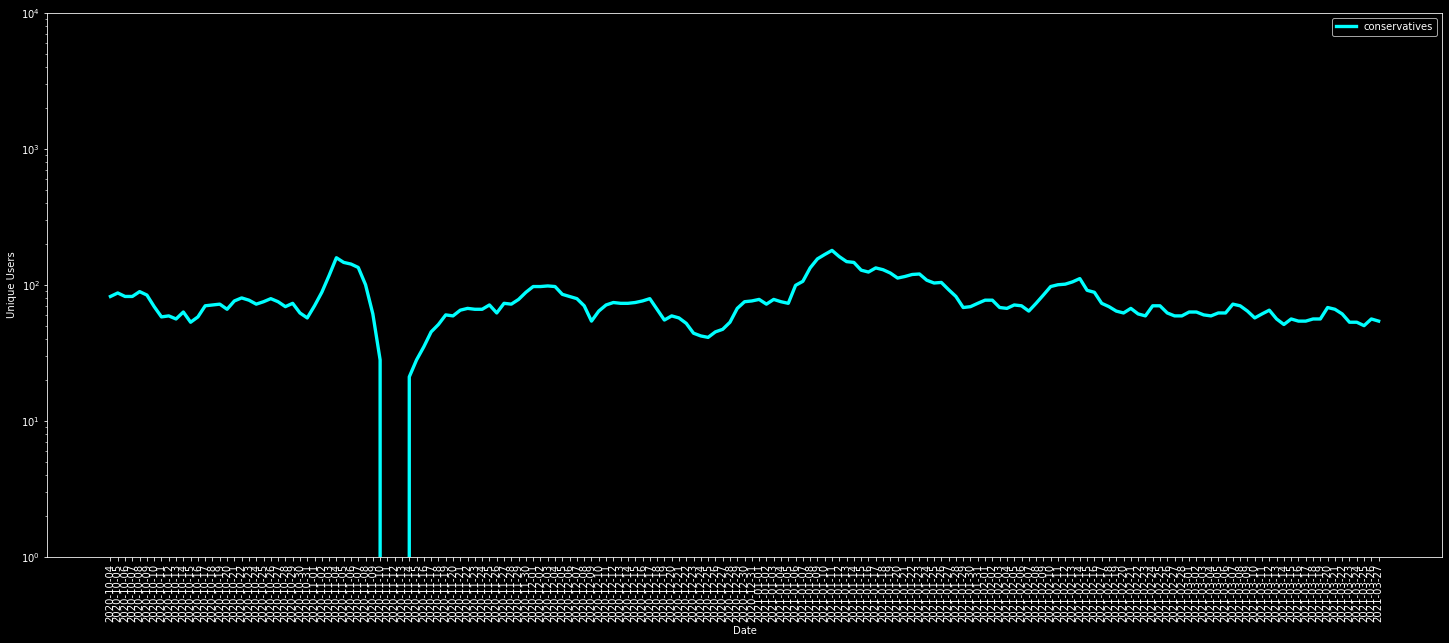

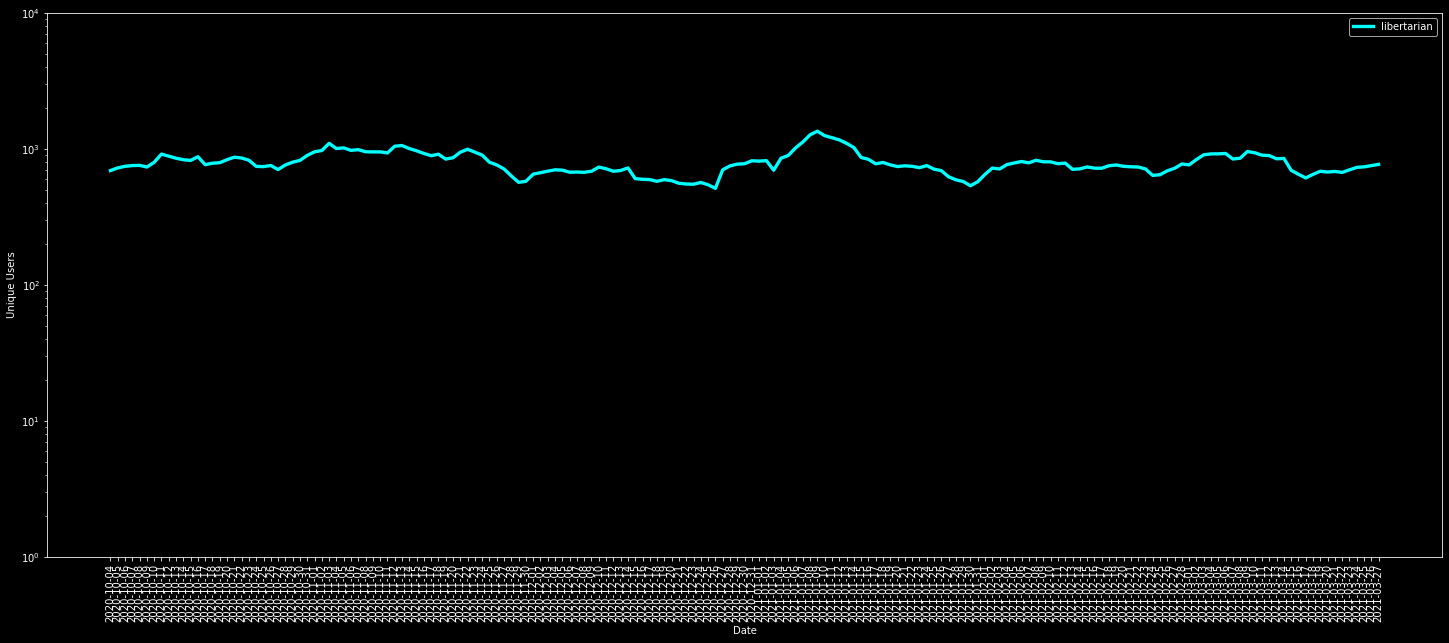

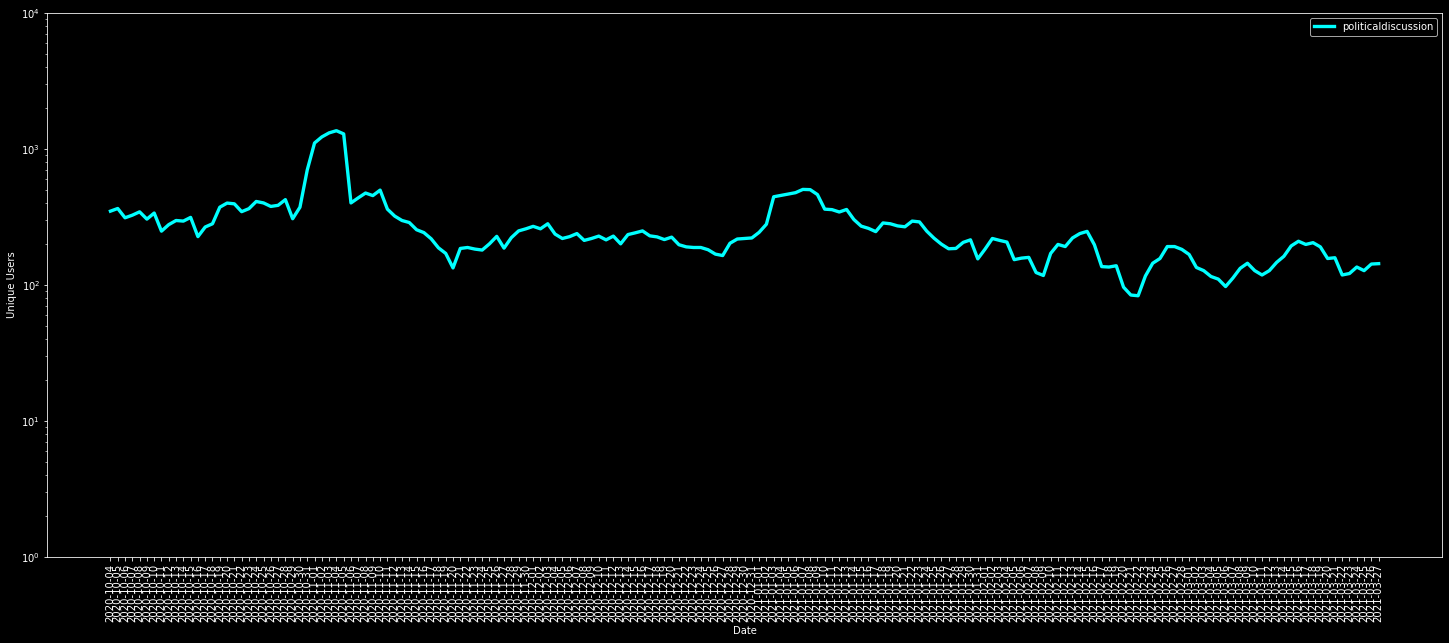

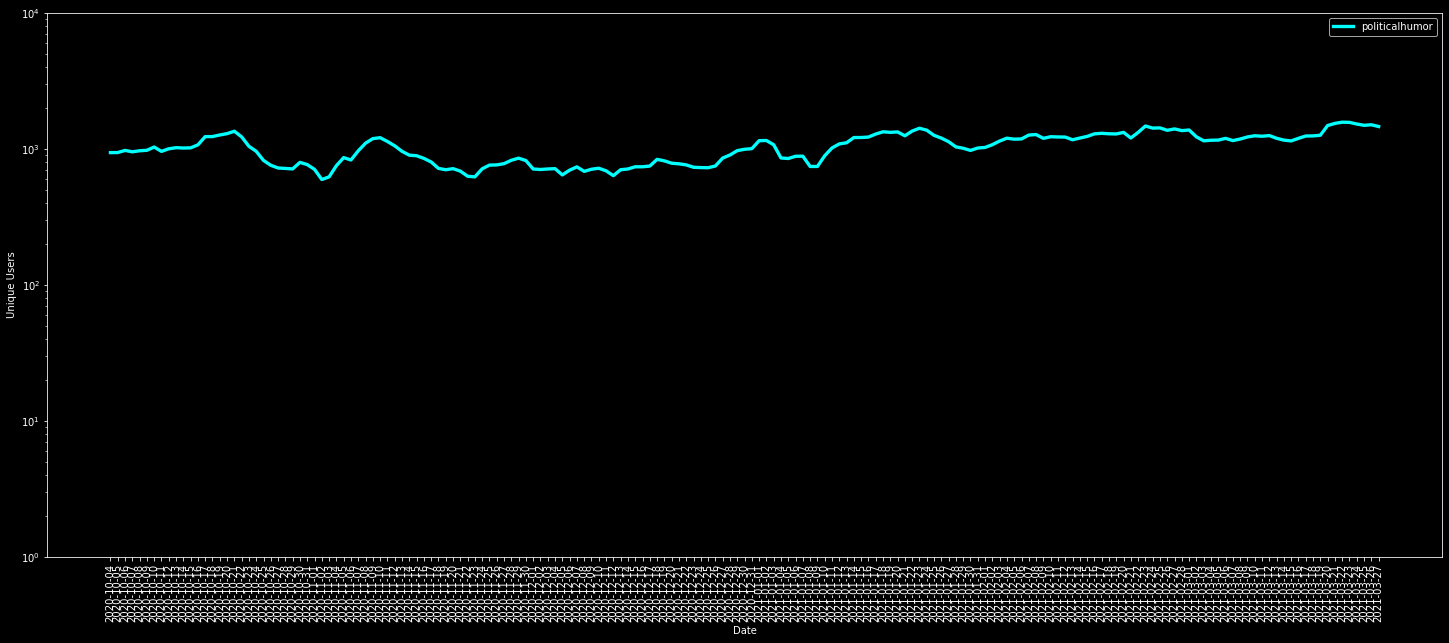

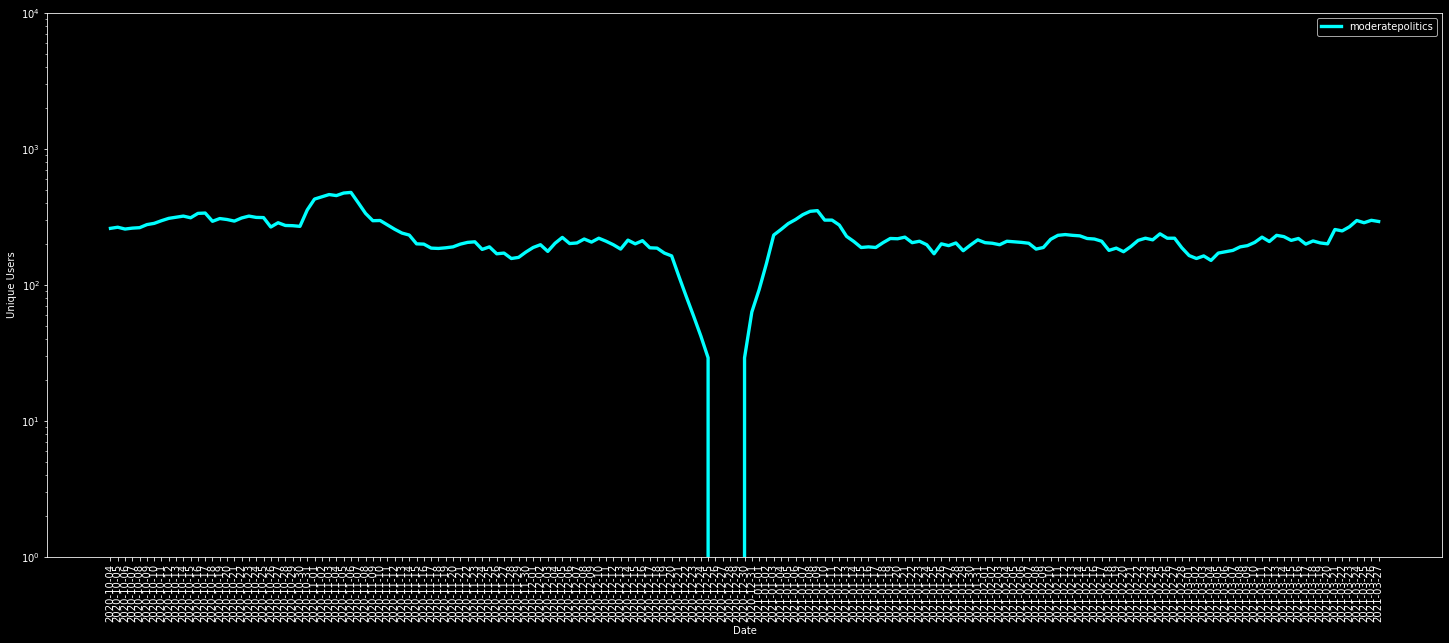

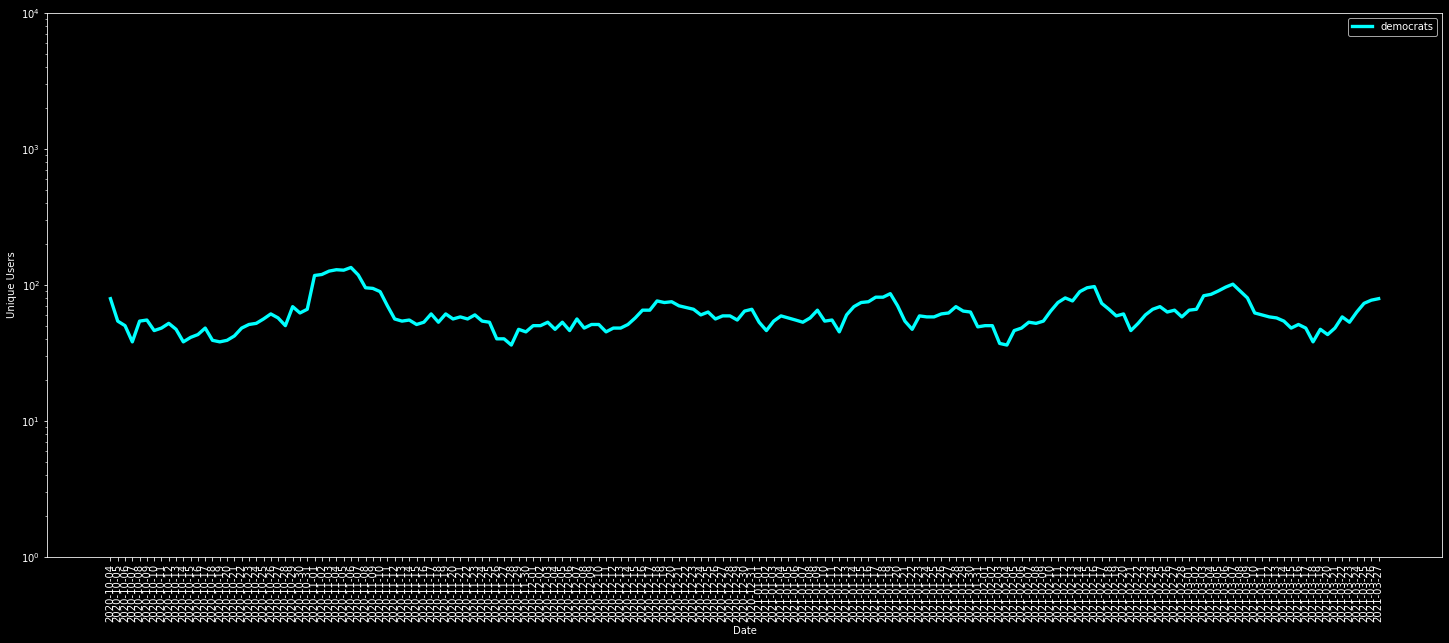

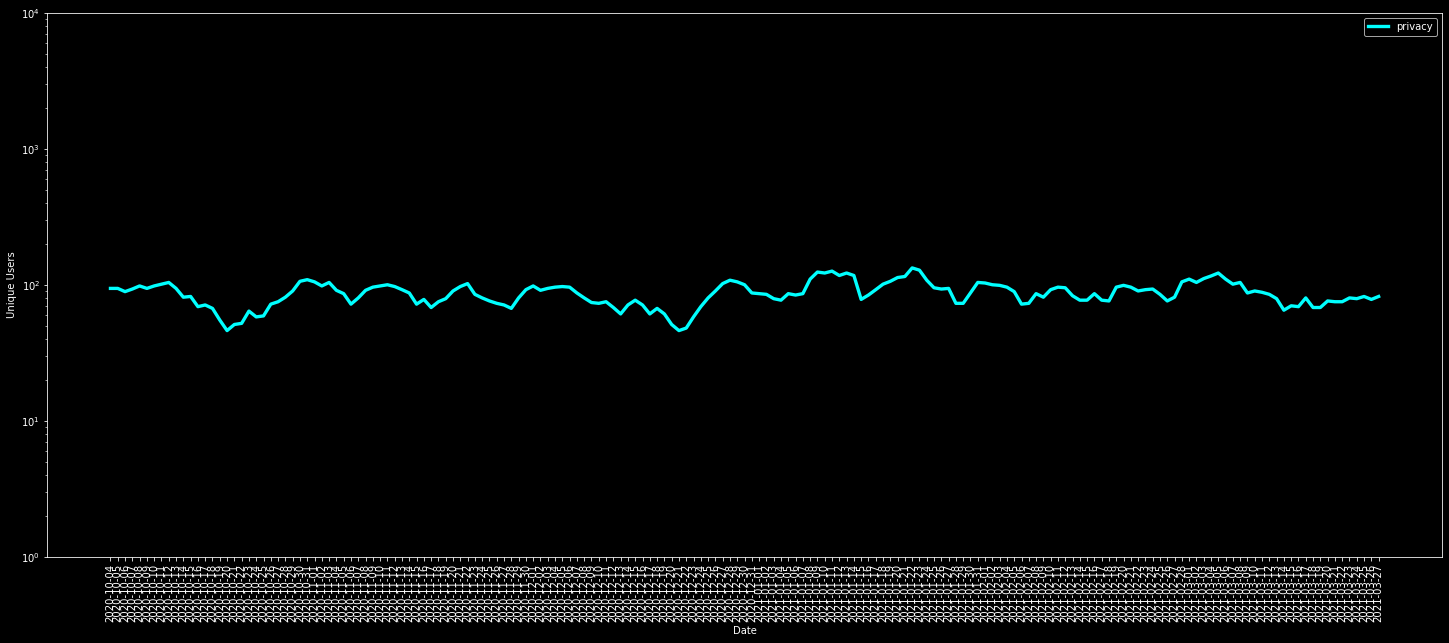

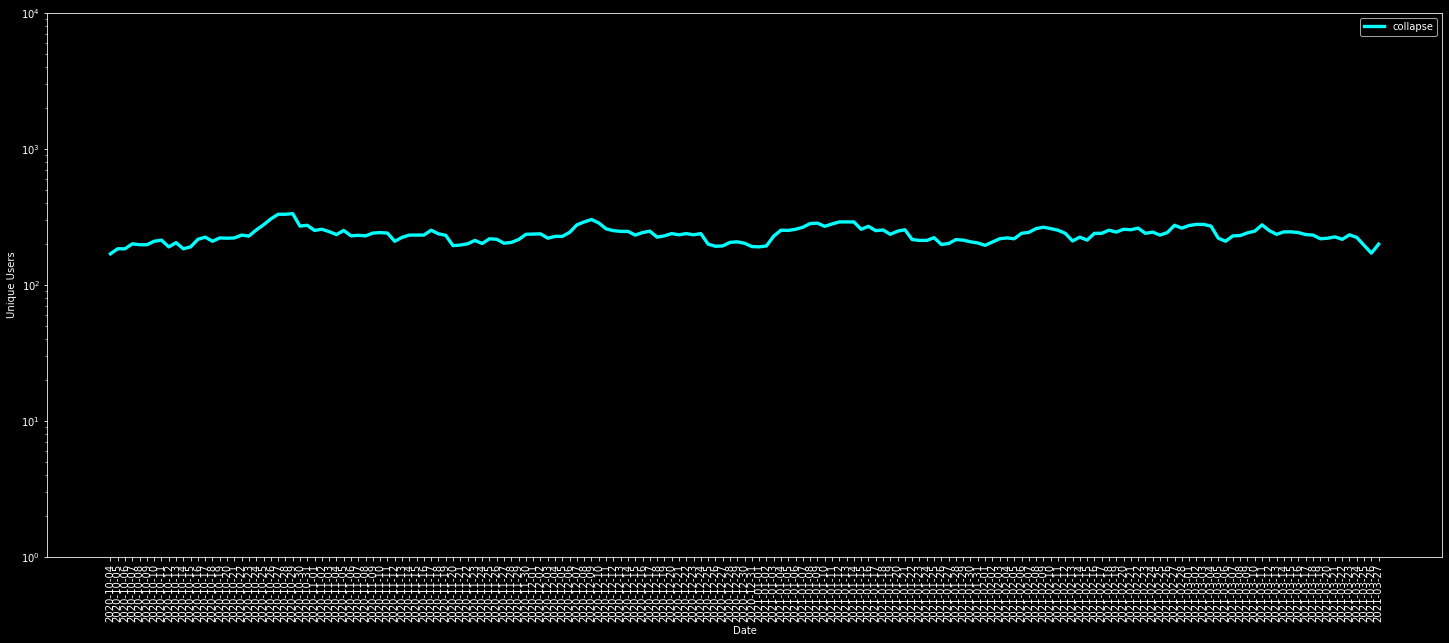

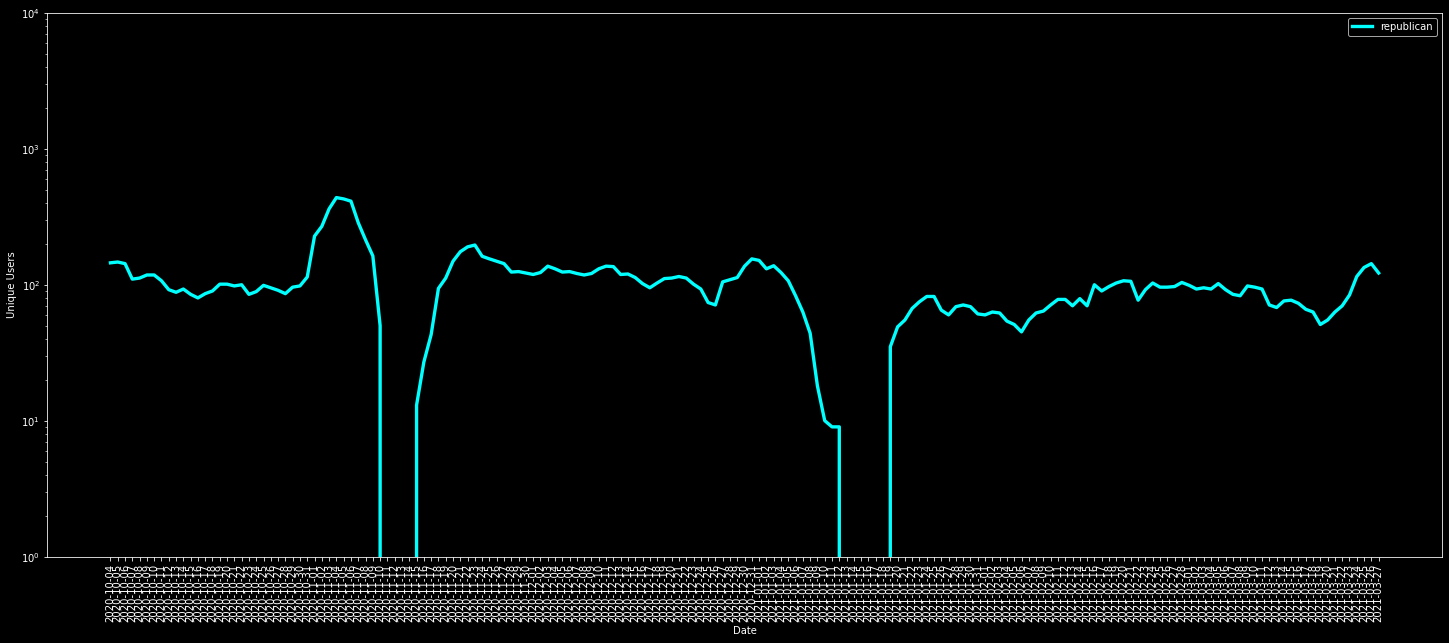

In [142]:
for sub in size_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(size_data.index, size_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Unique Users')
    plt.ylim(1,10000)  
    plt.yscale('log')
    plt.legend()

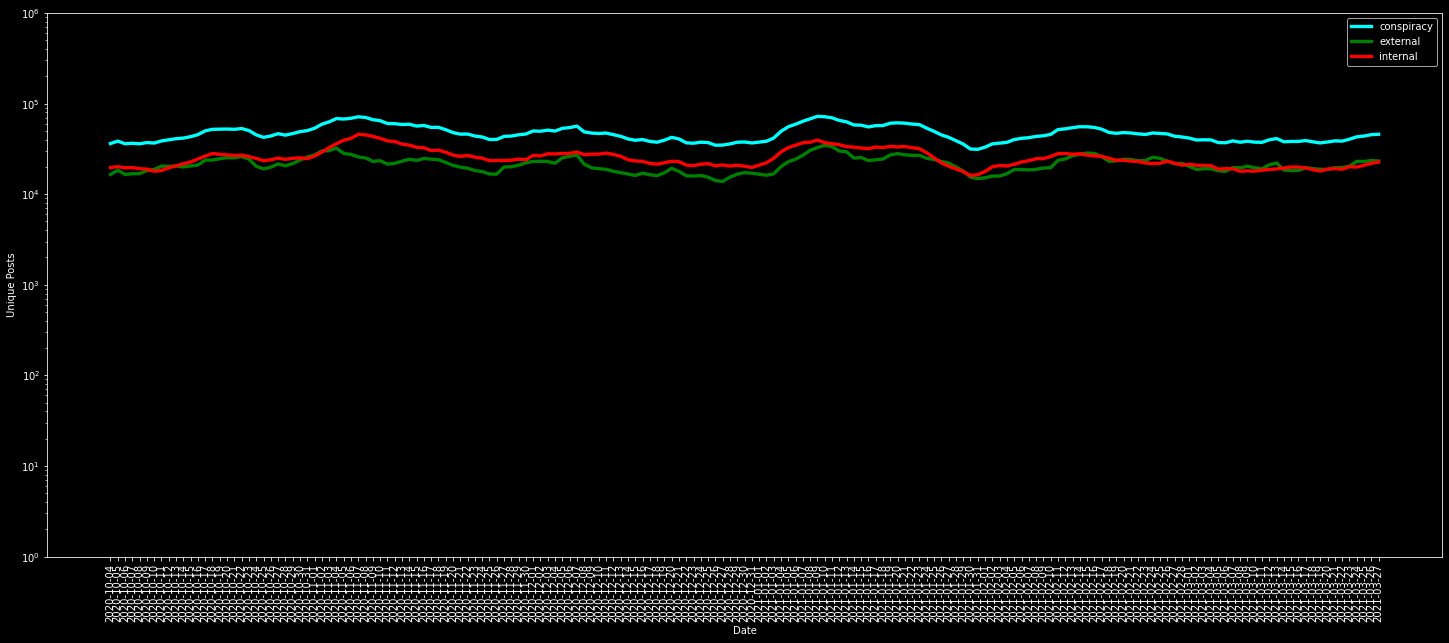

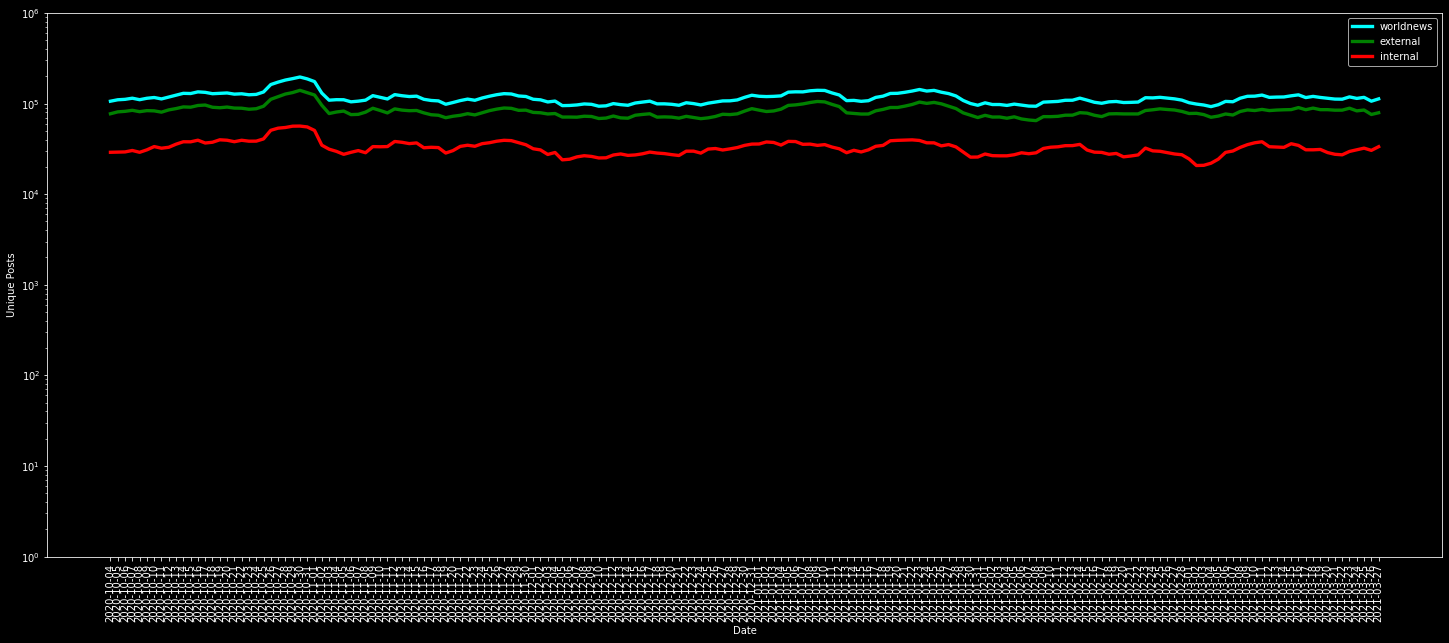

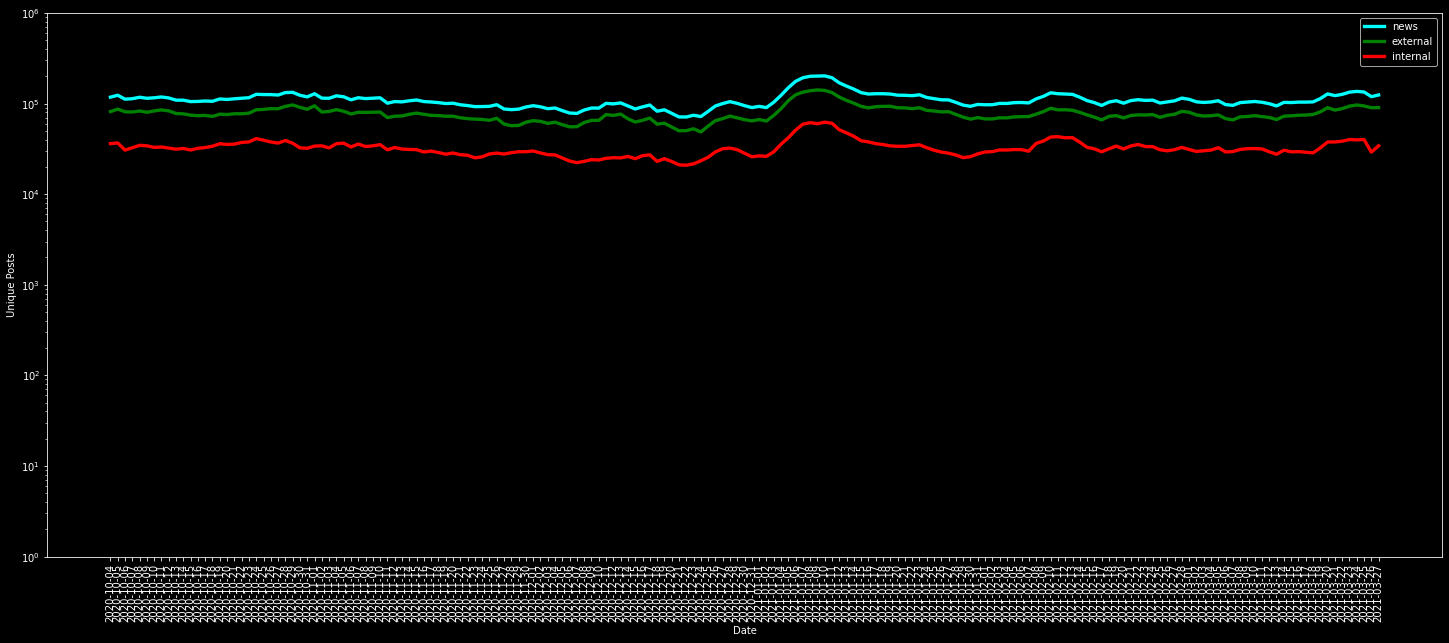

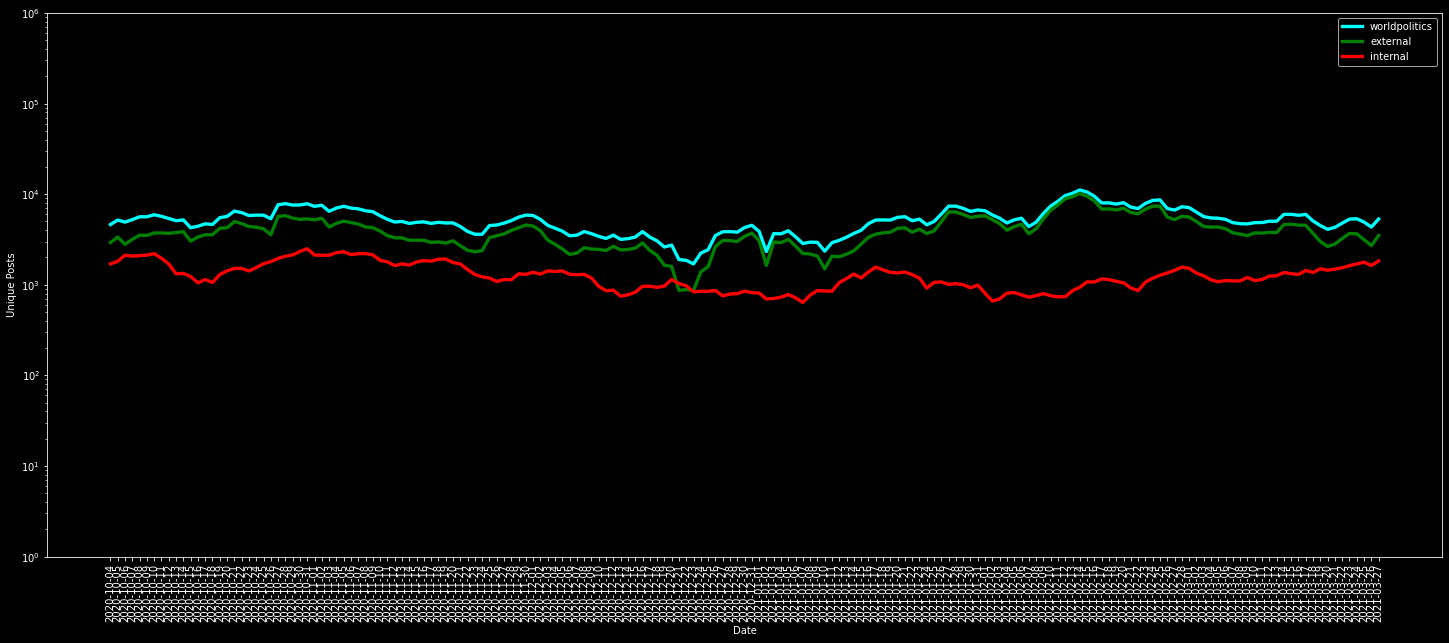

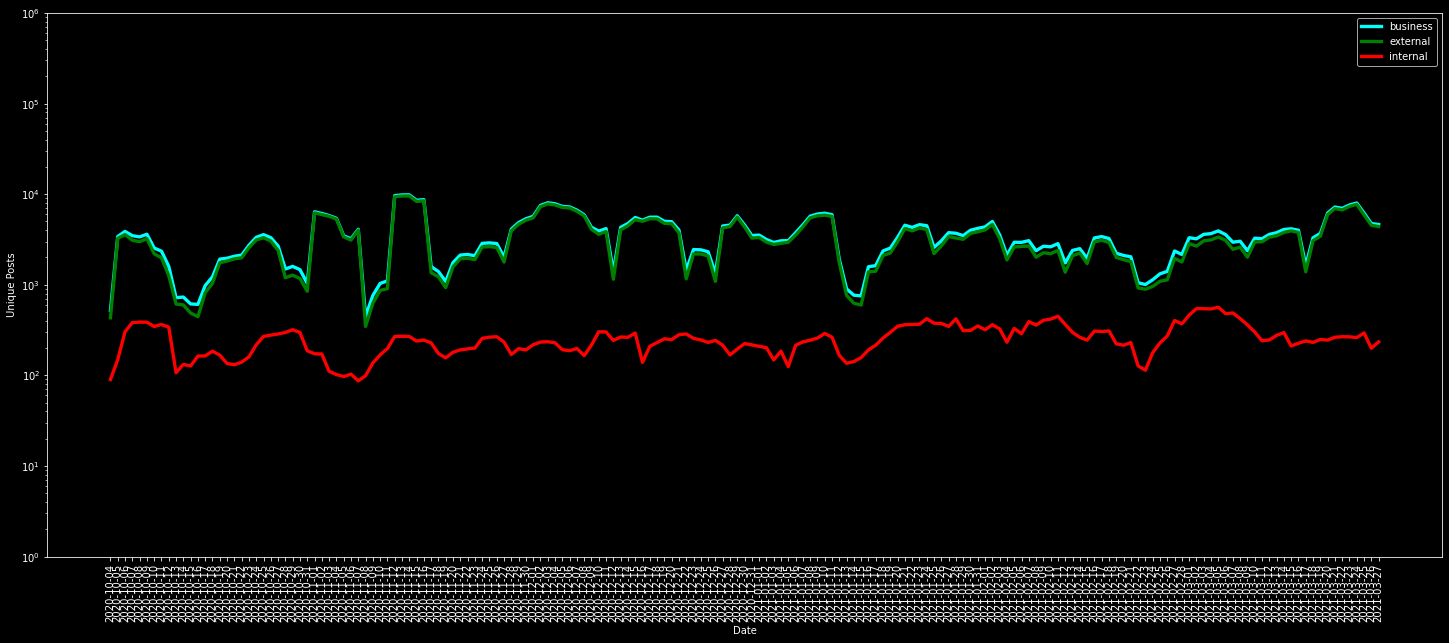

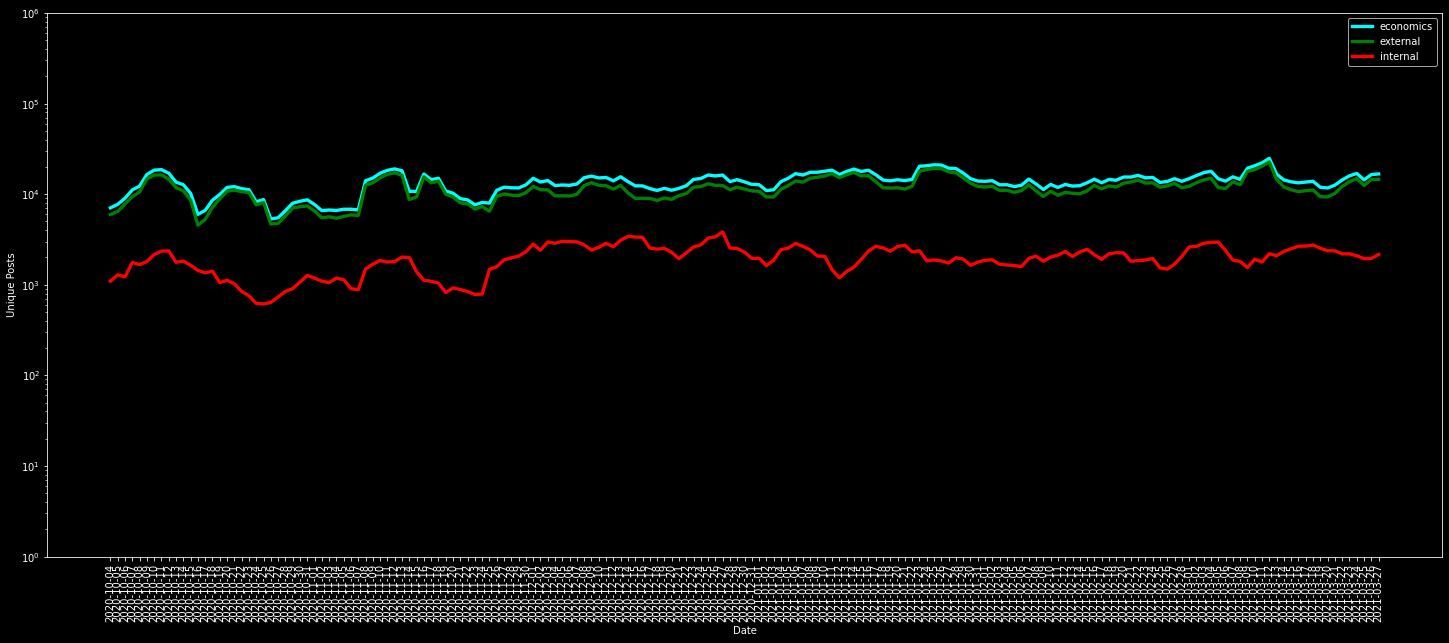

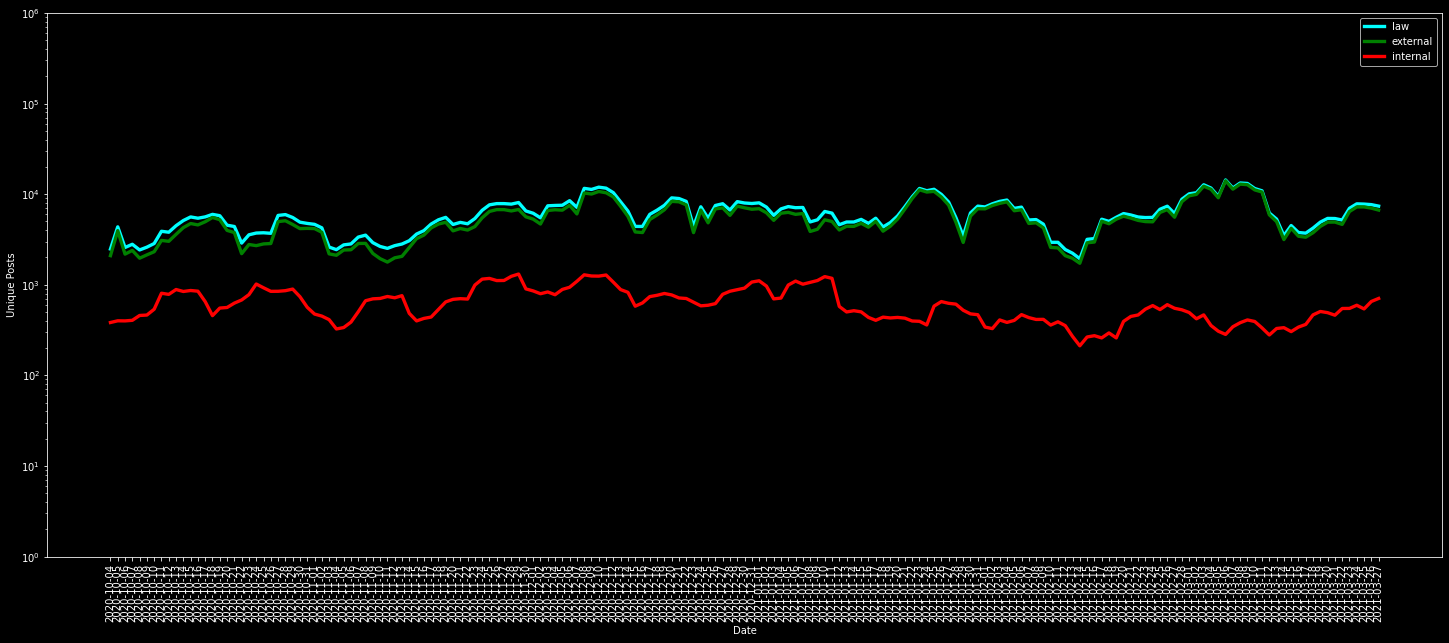

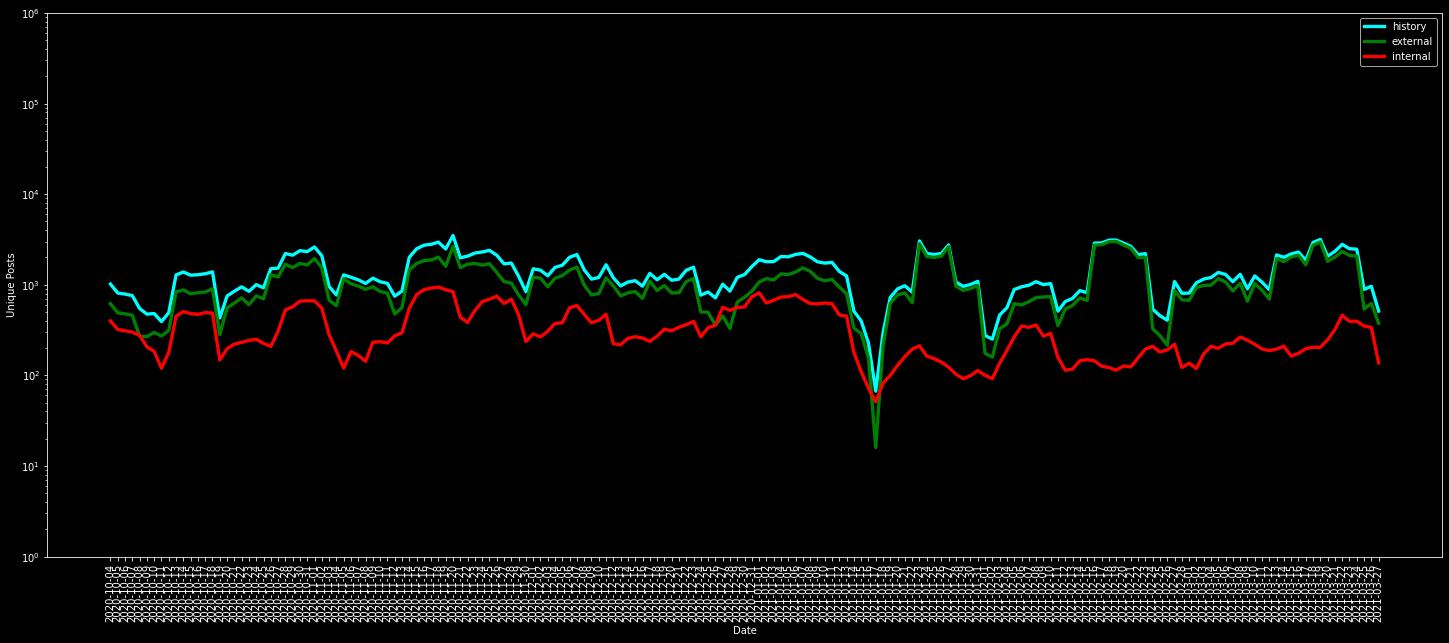

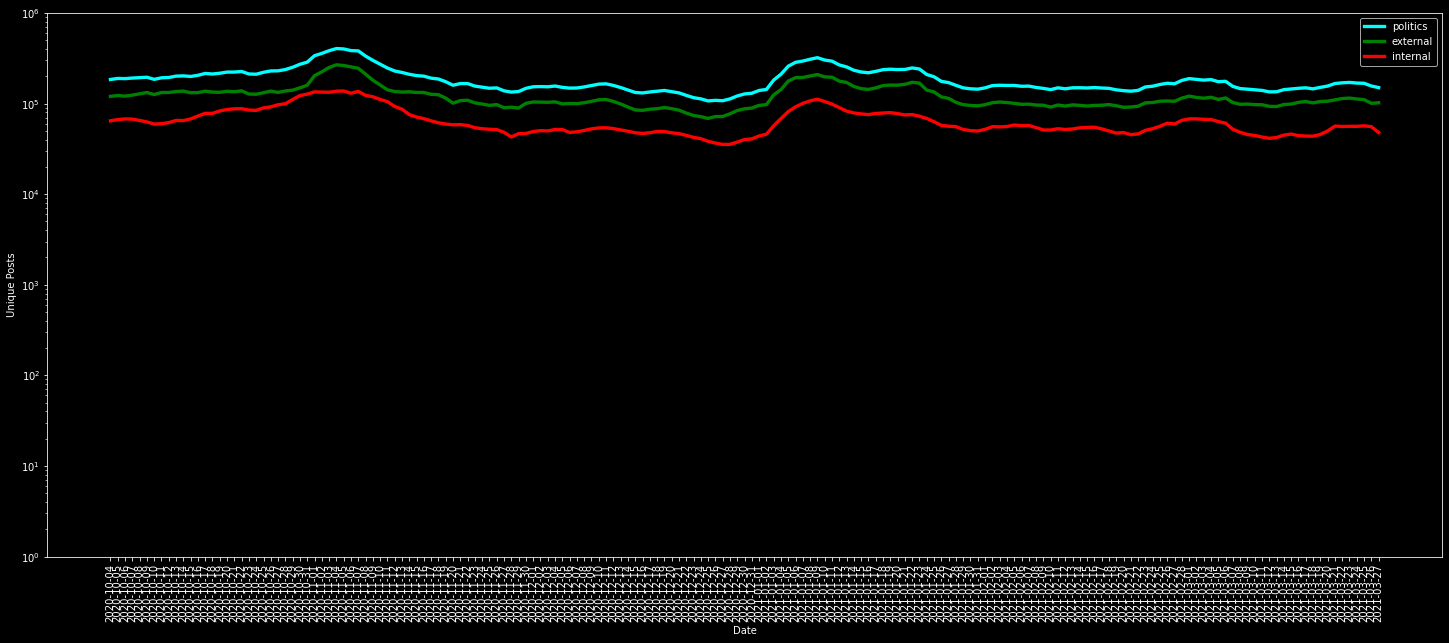

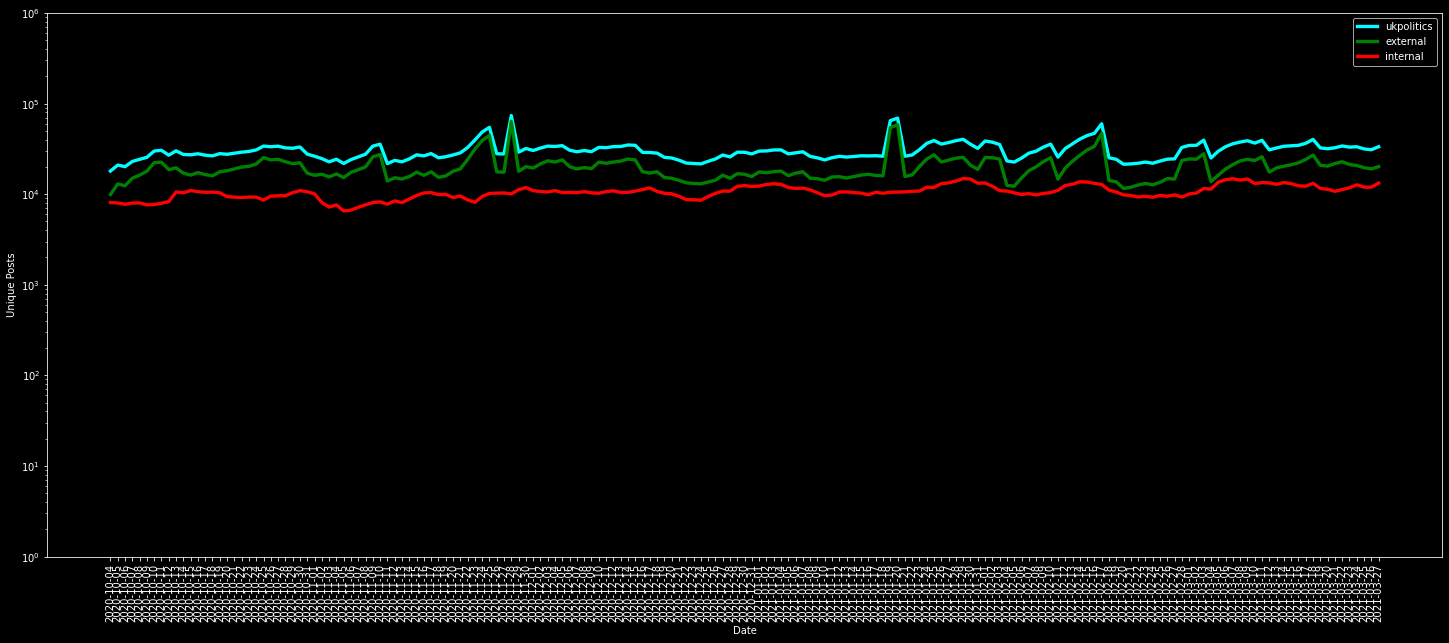

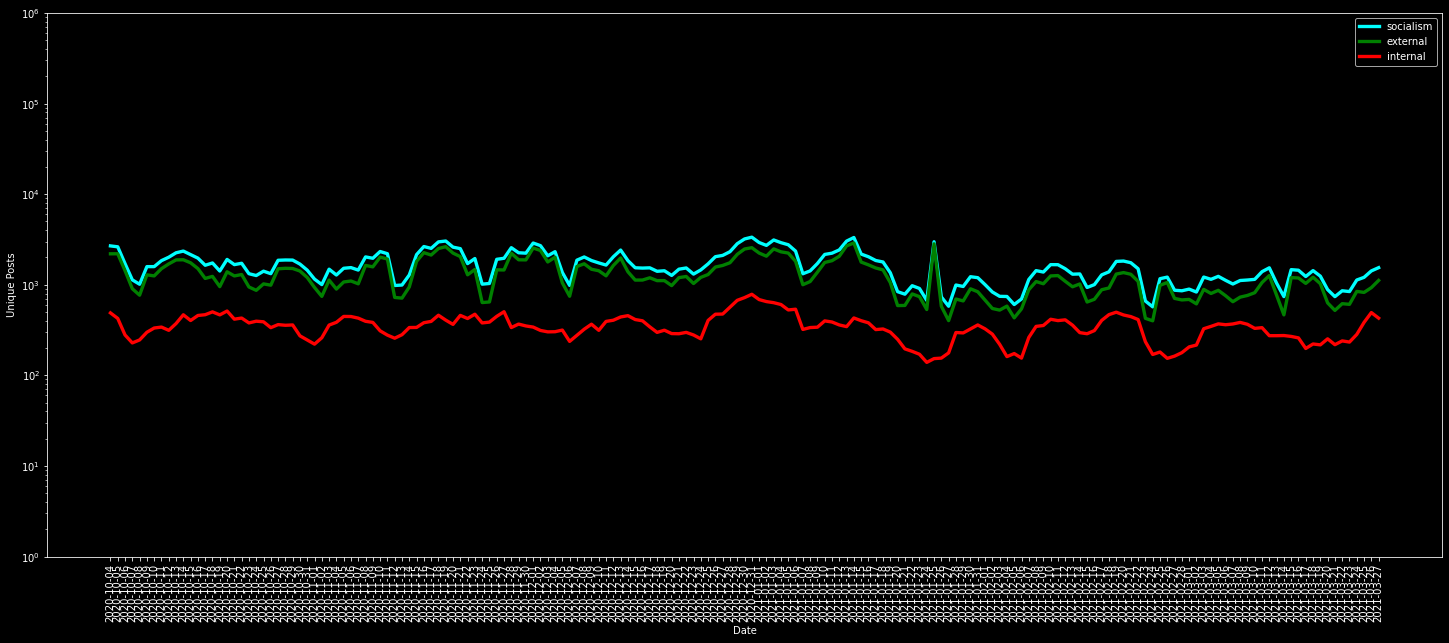

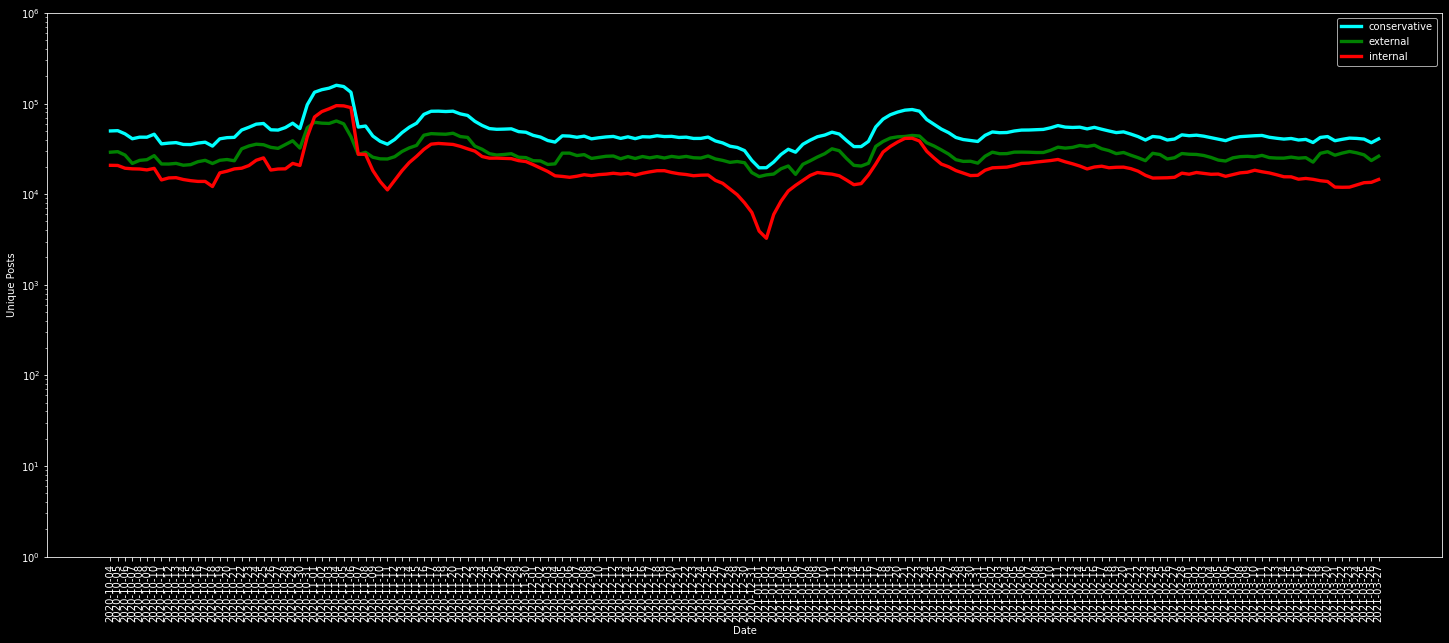

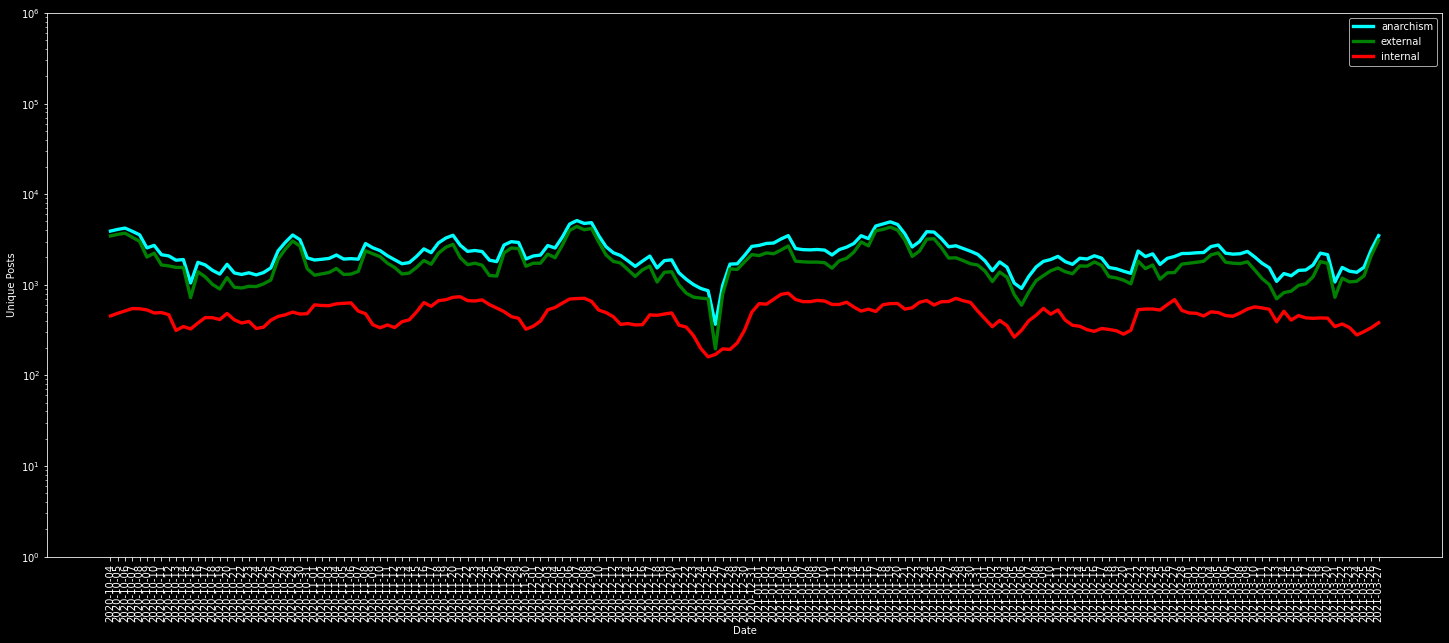

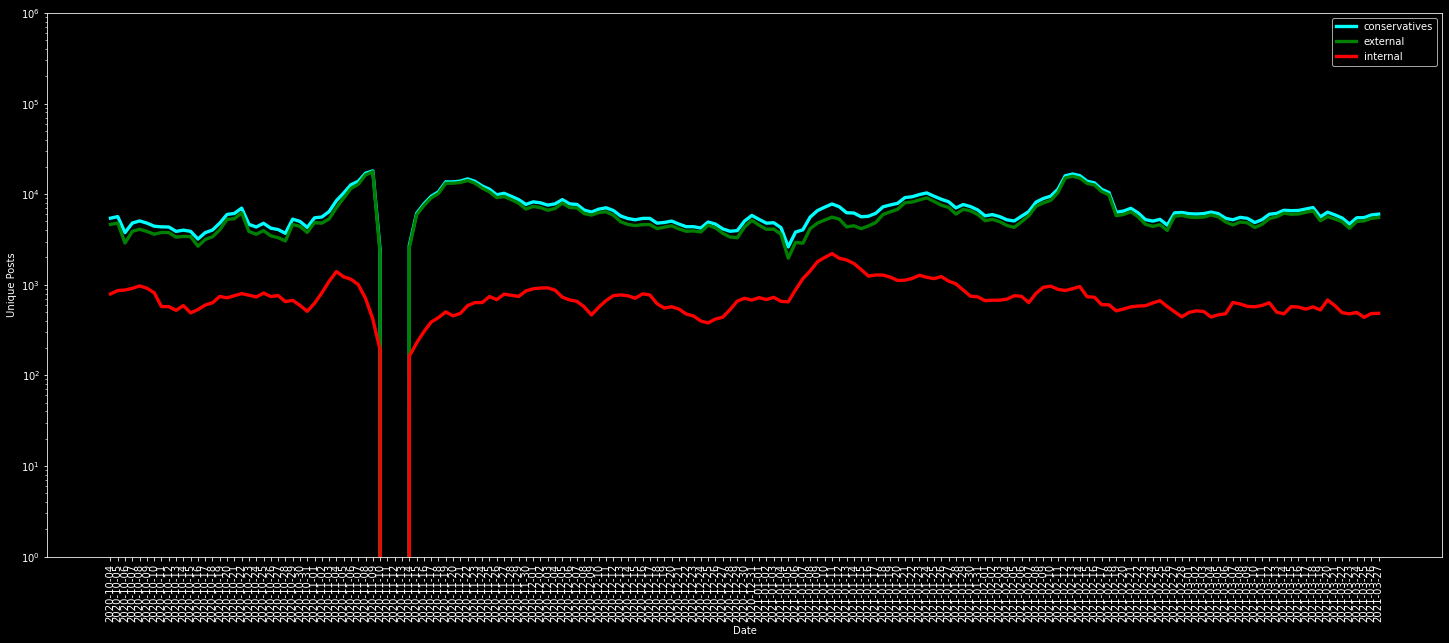

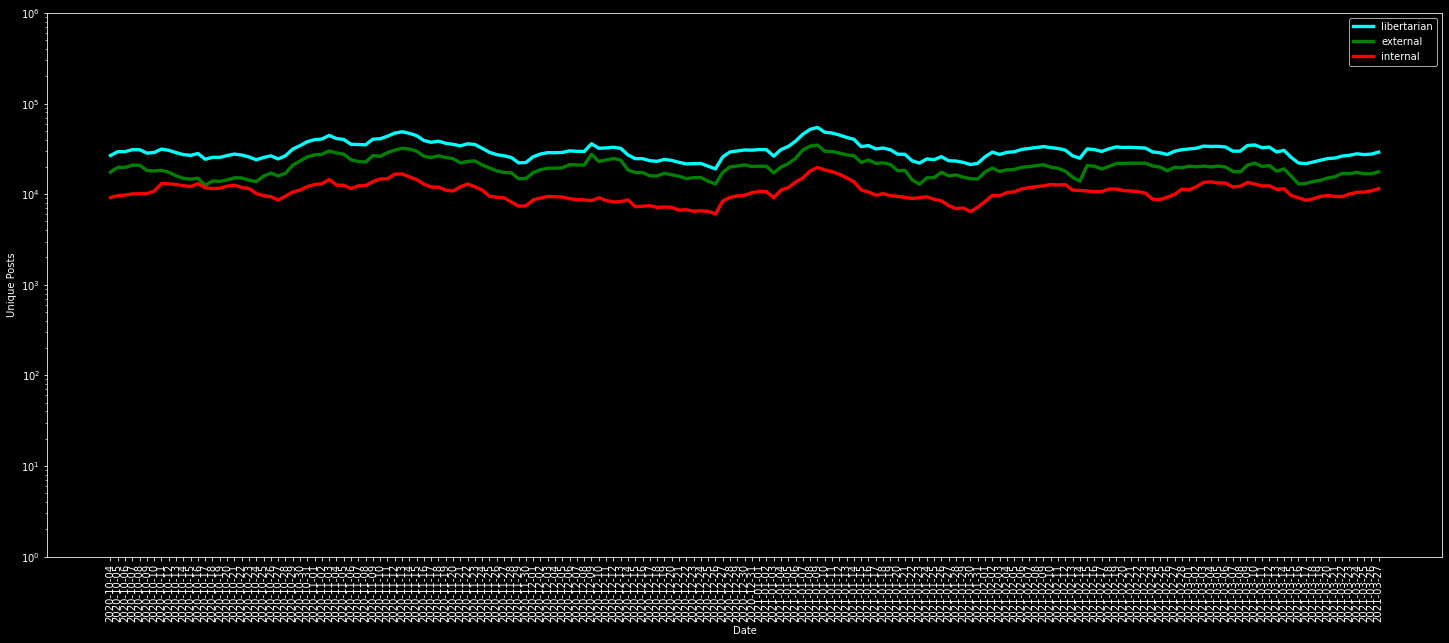

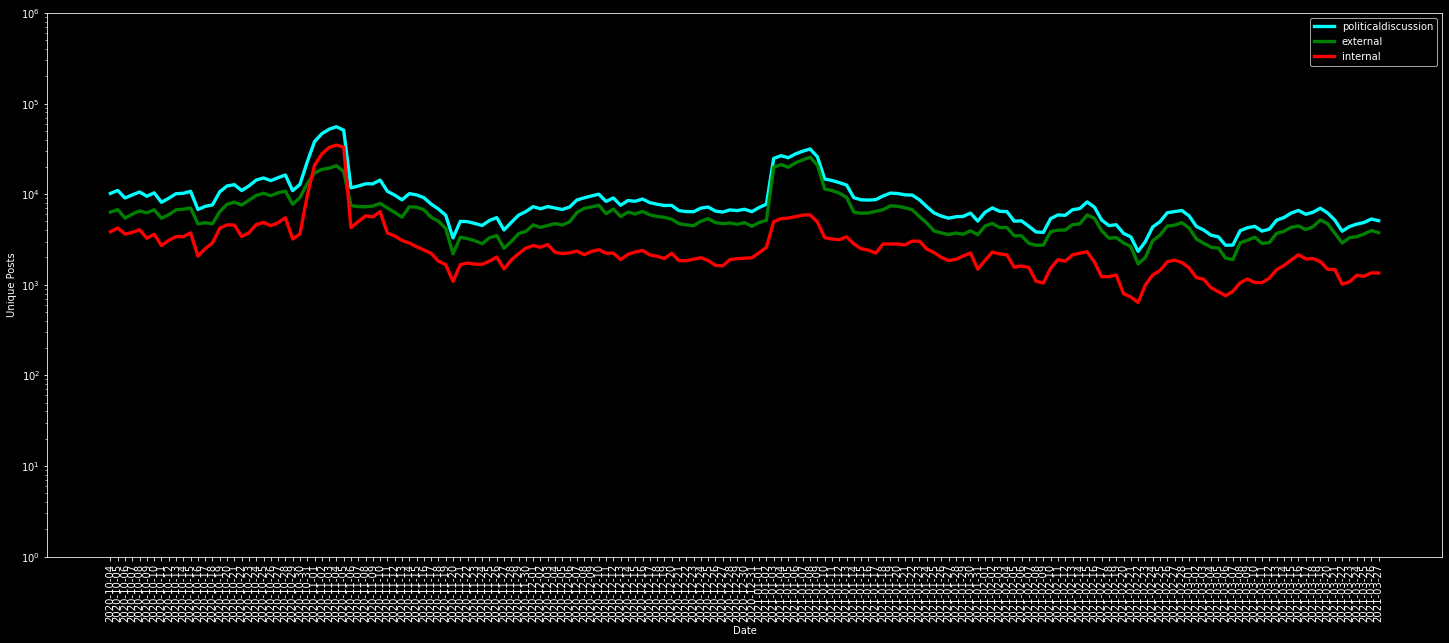

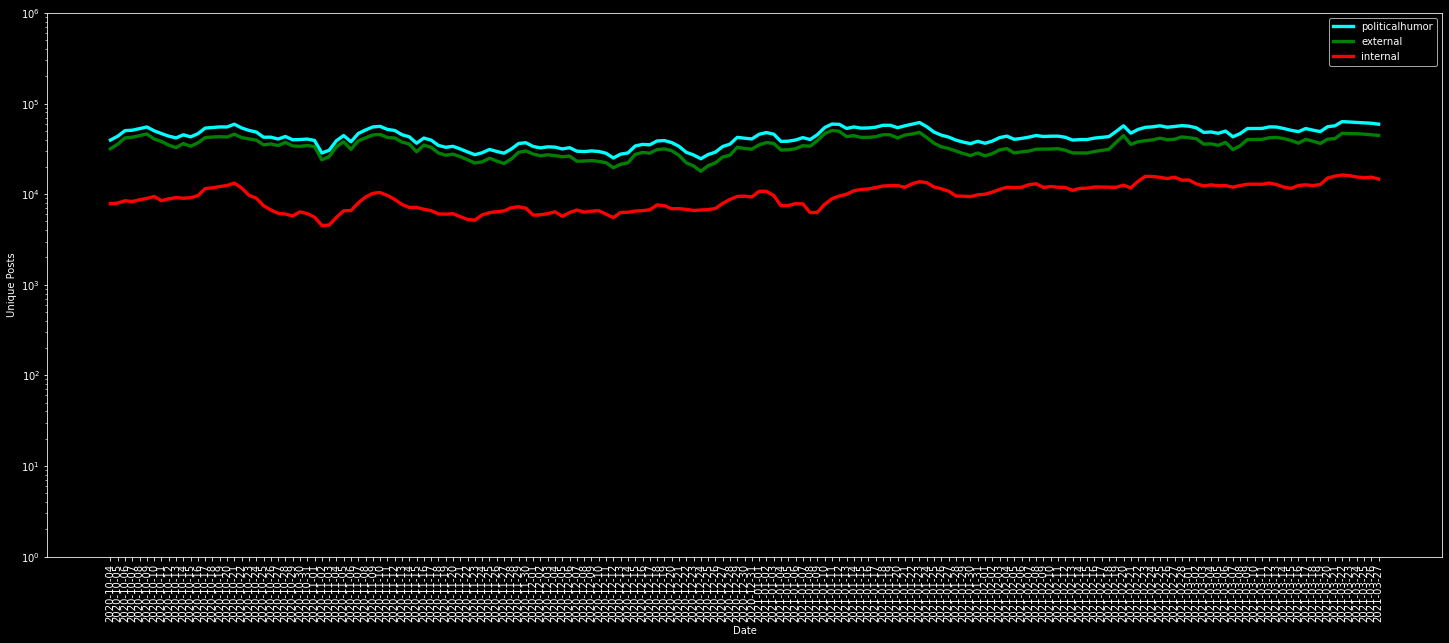

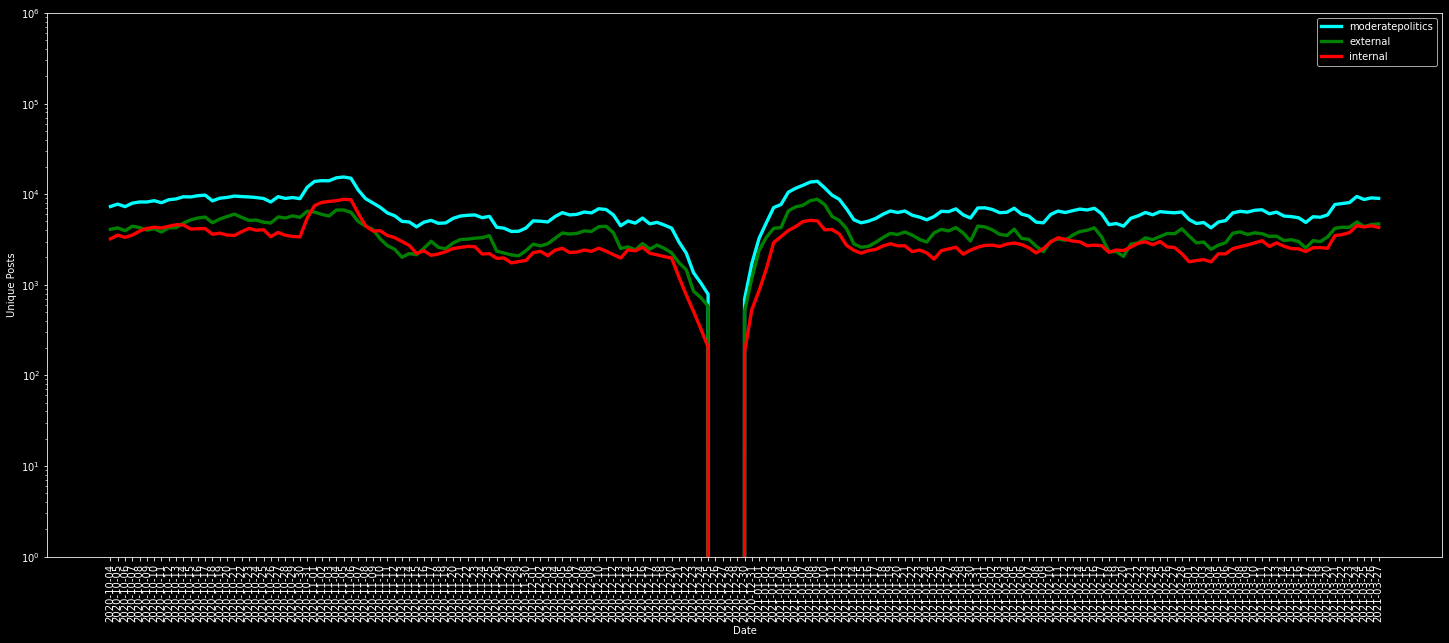

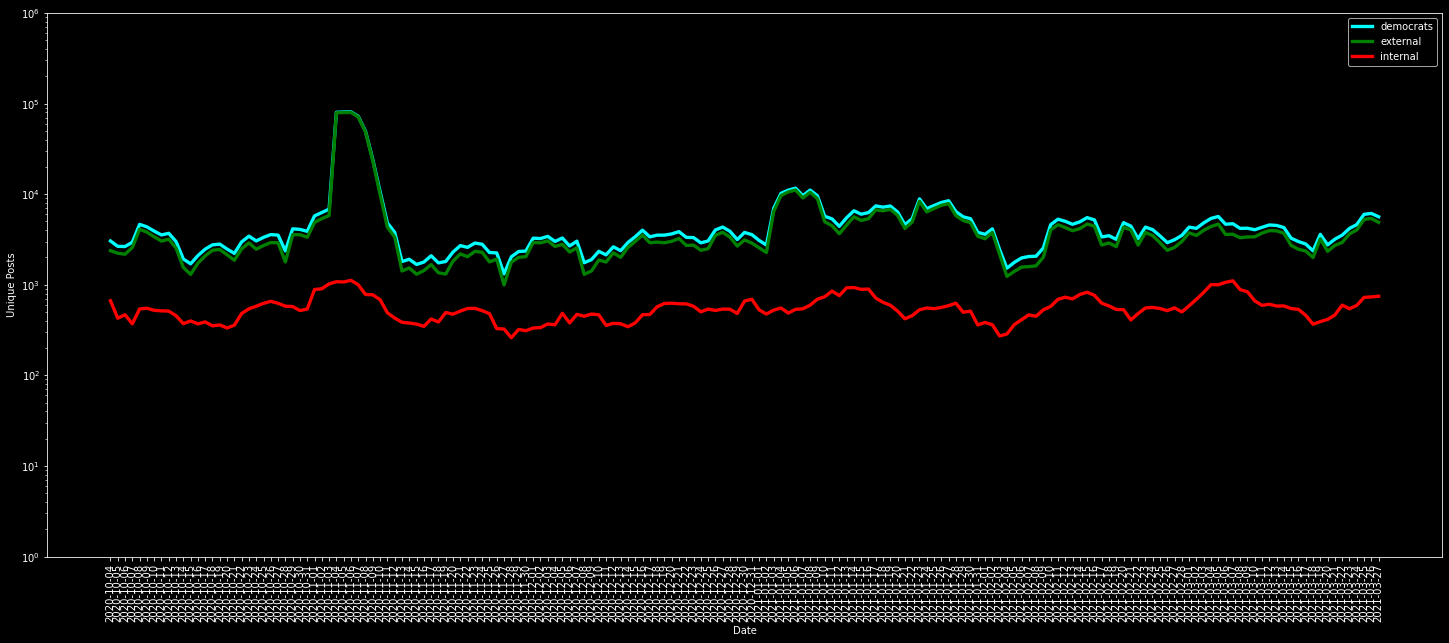

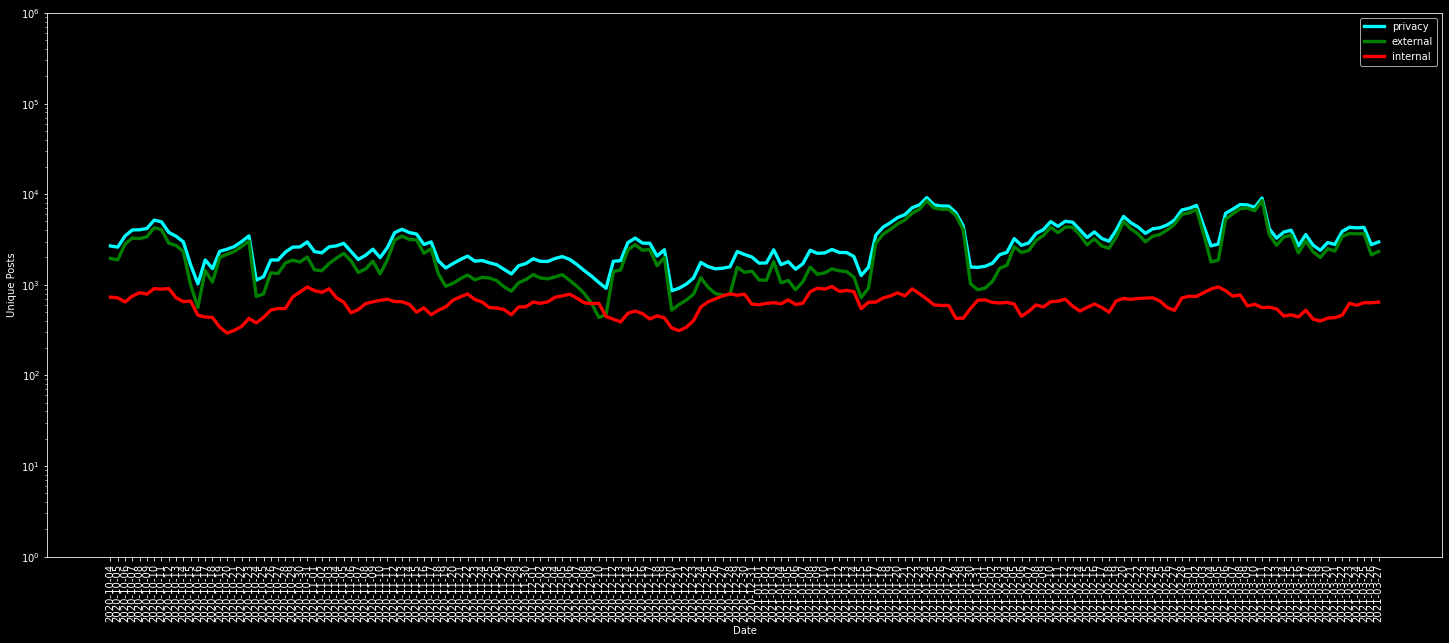

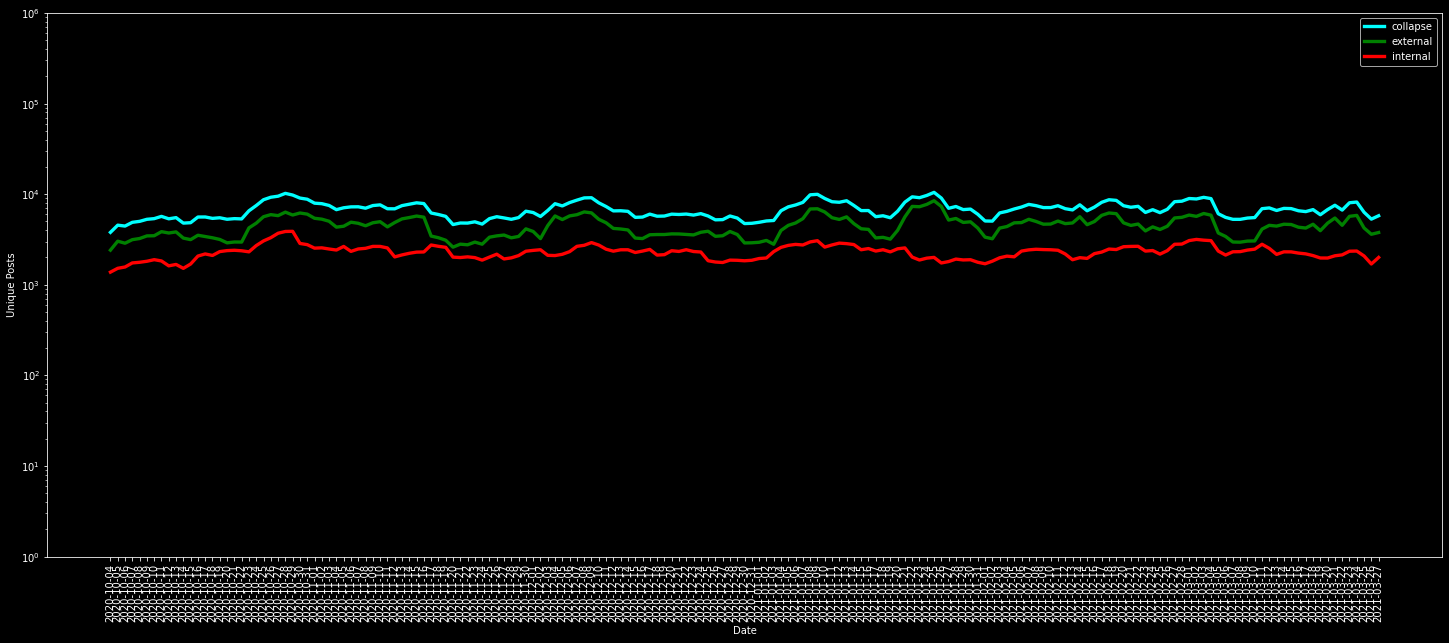

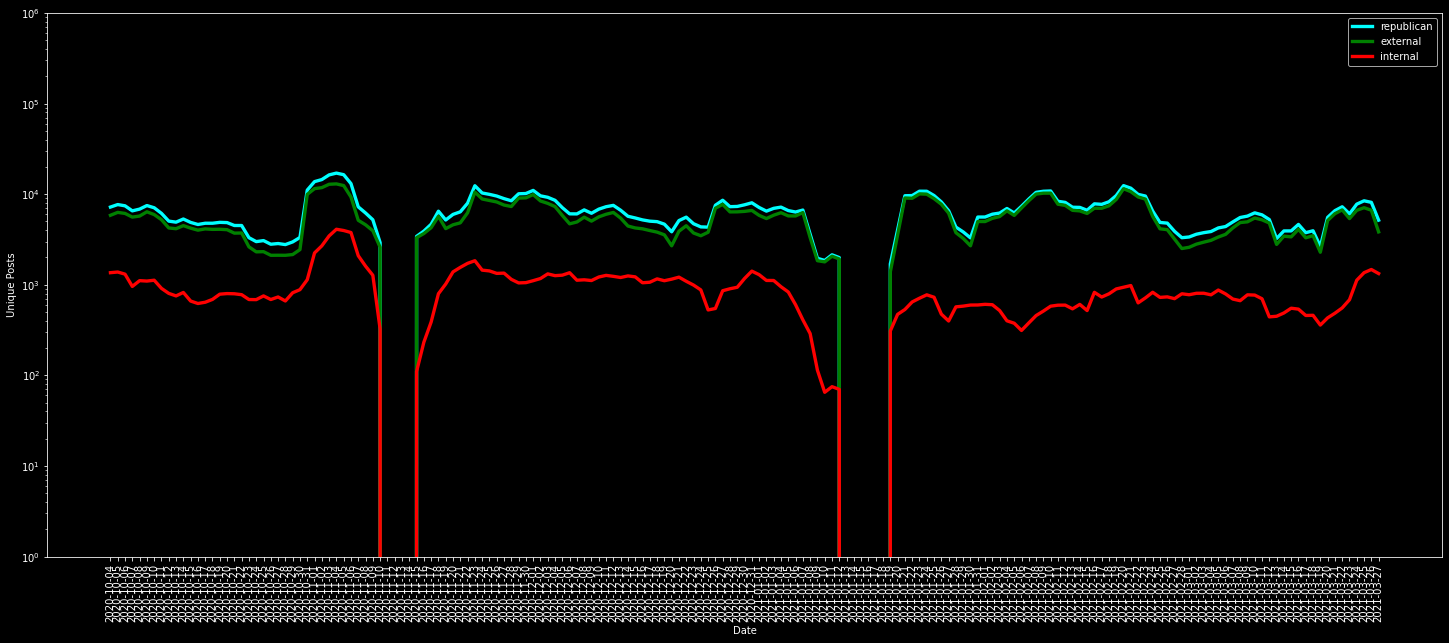

In [143]:
for sub in post_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(post_data.index, e_data[subbert][sub] + i_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.plot(e_data.index, e_data[subbert][sub], lw=3.333, c='green', label='external')
    plt.plot(i_data.index, i_data[subbert][sub], lw=3.333, c='red', label='internal')
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Unique Posts')
    plt.ylim(1,1000000)
    plt.yscale('log')
    plt.legend()